In [1]:
%matplotlib inline 
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import integrate
plt.rcParams.update({'font.size': 14})

## Showing the Error Propagation of Various Methods
### Euler Method

The code is solving an ordinary differential equation using the Euler method and calculates the error of the numerical solution for different numbers of time steps. Ploting the error as a function of the number of time steps using a logarithmic scale. The resulting plot shows the expected behavior of the error decreasing as the number of time steps increases, but also demonstrates the effect of numerical round-off errors for very large numbers of time steps.

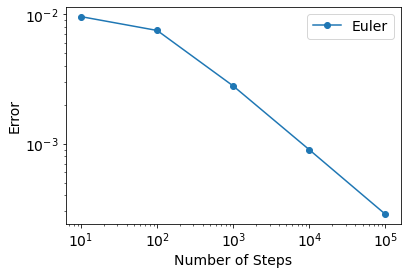

In [2]:
def fun_rhs(y, t):
    k = 1.2
    return -k * y

def euler_solver(fun_rhs, y0, dt, N):
    """Solve dy/dt = fun(y,t) using Euler's method.
    Inputs ...
    Returns: array of length N+1 with values of y
    """
    y = np.zeros(N+1)
    y[0] = y0
    t = 0
    for i in range(N):
        y[i+1] = y[i] + dt * (fun_rhs(y[i], t))
        t += dt
    return y

y0=1
k=1.2
dt = 0.1

num_steps_list = [10, 100, 1000, 10000, 100000]
error_list = []
for num_steps in num_steps_list:
    x = np.linspace(0, (num_steps+1)*dt, num_steps+1)
    x_euler = euler_solver(fun_rhs,y0,dt,N=num_steps)
    x_true = y0*np.exp(-k*x)
    error = np.sqrt(np.mean((x_euler - x_true)**2)) 
    error_list.append(error)

plt.loglog(num_steps_list, error_list,'o-',label='Euler')
plt.xlabel('Number of Steps')
plt.ylabel('Error')
plt.legend()
plt.show()

### Verlet Method 
The code is solving the simple harmonic oscillator problem using the Verlet algorithm and comparing the numerical results to the exact analytical solution. It calculates the maximum absolute error for each time step size and ploting it against the time step size on a log-log scale. I also included the plot of an expected error of verlet method which is represented as a black dashed line.

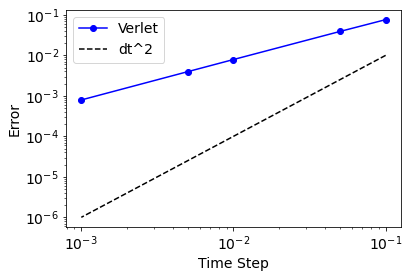

In [3]:
def harmonic_oscillator(t, A, w):
    return A * np.cos(w*t)

def harmonic_oscillator_force(x):
    return -x

def verlet(x0, v0, force_func, dt, n_steps):
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)
    x[0] = x0
    v[0] = v0
    for i in range(1, n_steps):
        x[i] = x[i-1] + v[i-1]*dt + 0.5*force_func(x[i-1])*(dt**2)
        v[i] = v[i-1] + 0.5*(force_func(x[i-1]) + force_func(x[i]))*dt
    return x, v


x0 = 1.0  
v0 = 0.0  
A = x0   
w = 1.0  
dt_vals = np.array([0.1, 0.05, 0.01, 0.005, 0.001])  
n_steps_vals = np.array([int(10.0/dt) for dt in dt_vals])  


x_verlet = np.zeros((len(dt_vals), max(n_steps_vals)))
error_verlet = np.zeros(len(dt_vals))
for i, dt in enumerate(dt_vals):
    n_steps = n_steps_vals[i]
    x_verlet[i,:n_steps], _ = verlet(x0, v0, harmonic_oscillator_force, dt, n_steps)
    t = np.linspace(0, dt*n_steps, n_steps)
    x_exact = harmonic_oscillator(t, A, w)
    error_verlet[i] = np.max(np.abs(x_verlet[i,:n_steps] - x_exact))


plt.loglog(dt_vals, error_verlet, 'bo-', label='Verlet')
plt.loglog(dt_vals, dt_vals**2, 'k--', label='dt^2')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.legend()
plt.show()

The code below, calculates the error at different numbers of time steps and ploting the error as a function of the number of time steps, in order to show the scaling of the error with respect to the time step size.

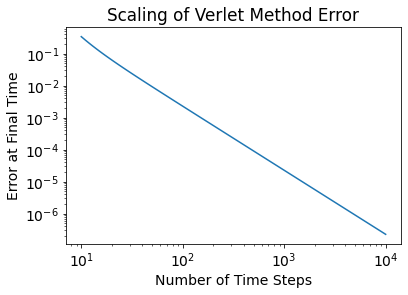

In [4]:
# Define parameters
m = 1   # mass of particle
k = 1   # spring constant
x0 = 1  # initial position
v0 = 0  # initial velocity
tmax = 10  # maximum simulation time

# Define function to calculate acceleration
def acceleration(x):
    return -k/m * x

# Define function to calculate exact solution
def exact_solution(t):
    return x0*np.cos(np.sqrt(k/m)*t)

# Define function to calculate error at final time step
def final_error(n):
    # Calculate time step size
    dt = tmax / n
    
    # Initialize arrays for position and velocity
    x = np.zeros(n+1)
    v = np.zeros(n+1)

    # Set initial position and velocity
    x[0] = x0
    v[0] = v0

    # Calculate position and velocity at each time step using Verlet method
    for i in range(1, n+1):
        x[i] = x[i-1] + v[i-1]*dt + 0.5*acceleration(x[i-1])*dt**2
        v[i] = v[i-1] + 0.5*(acceleration(x[i-1]) + acceleration(x[i]))*dt

    # Calculate exact solution at final time
    x_exact = exact_solution(tmax)

    # Calculate error at final time
    error = np.abs(x_exact - x[-1])

    return error

# Calculate error at different number of time steps
n_values = np.logspace(1, 4, 100, dtype=int)
errors = [final_error(n) for n in n_values]

# Plot error vs. number of time steps
plt.loglog(n_values, errors)
plt.xlabel('Number of Time Steps')
plt.ylabel('Error at Final Time')
plt.title('Scaling of Verlet Method Error')
plt.show()

The goal of this code is to calculate the error at each time step of the simulation for a specific number of time steps and plot the error as a function of time.

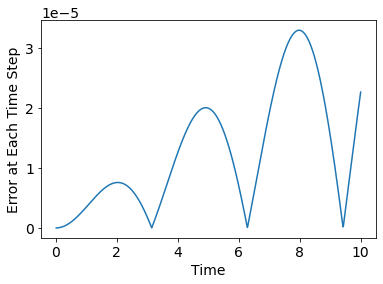

In [5]:
# Define parameters
m = 1   # mass of particle
k = 1   # spring constant
x0 = 1  # initial position
v0 = 0  # initial velocity
tmax = 10  # maximum simulation time

# Define function to calculate acceleration
def acceleration(x):
    return -k/m * x

# Define function to calculate exact solution
def exact_solution(t):
    return x0*np.cos(np.sqrt(k/m)*t)

# Define function to calculate error at each time step
def time_step_error(n):
    # Calculate time step size
    dt = tmax / n
    
    # Initialize arrays for position and velocity
    x = np.zeros(n+1)
    v = np.zeros(n+1)

    # Set initial position and velocity
    x[0] = x0
    v[0] = v0

    # Calculate position and velocity at each time step using Verlet method
    errors = []
    for i in range(1, n+1):
        x[i] = x[i-1] + v[i-1]*dt + 0.5*acceleration(x[i-1])*dt**2
        v[i] = v[i-1] + 0.5*(acceleration(x[i-1]) + acceleration(x[i]))*dt

        # Calculate exact solution at current time step
        t = i*dt
        x_exact = exact_solution(t)

        # Calculate error at current time step
        error = np.abs(x_exact - x[i])
        errors.append(error)

    return errors

# Calculate error at each time step for a specific number of time steps
n = 1000
errors = time_step_error(n)

# Plot error vs. time step
time_steps = np.linspace(0, tmax, n+1)[1:]
plt.plot(time_steps, errors)
plt.xlabel('Time')
plt.ylabel('Error at Each Time Step')
# plt.title('Error Propagation using Verlet Method')
plt.show()


### RK4 Method 
Calculates the error at different numbers of time steps and ploting the error as a function of the number of time steps, in order to show the scaling of the error with respect to the time step size for the RK4 method.

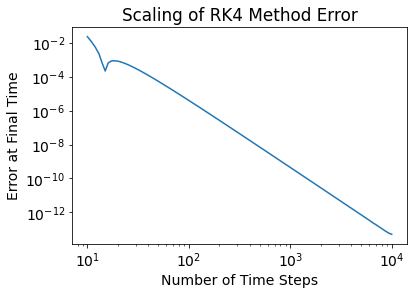

In [6]:
# Define parameters
m = 1   # mass of particle
k = 1   # spring constant
x0 = 1  # initial position
v0 = 0  # initial velocity
tmax = 10  # maximum simulation time

# Define function to calculate acceleration
def acceleration(x):
    return -k/m * x

# Define function to calculate exact solution
def exact_solution(t):
    return x0*np.cos(np.sqrt(k/m)*t)

# Define function to calculate error at final time step
def final_error(n):
    # Calculate time step size
    dt = tmax / n
    
    # Initialize arrays for position and velocity
    x = np.zeros(n+1)
    v = np.zeros(n+1)

    # Set initial position and velocity
    x[0] = x0
    v[0] = v0

    # Calculate position and velocity at each time step using RK4 method
    for i in range(1, n+1):
        k1v = acceleration(x[i-1])
        k1x = v[i-1]
        k2v = acceleration(x[i-1] + 0.5*dt*k1x)
        k2x = v[i-1] + 0.5*dt*k1v
        k3v = acceleration(x[i-1] + 0.5*dt*k2x)
        k3x = v[i-1] + 0.5*dt*k2v
        k4v = acceleration(x[i-1] + dt*k3x)
        k4x = v[i-1] + dt*k3v
        
        x[i] = x[i-1] + (1/6)*(k1x + 2*k2x + 2*k3x + k4x)*dt
        v[i] = v[i-1] + (1/6)*(k1v + 2*k2v + 2*k3v + k4v)*dt

    # Calculate exact solution at final time
    x_exact = exact_solution(tmax)

    # Calculate error at final time
    error = np.abs(x_exact - x[-1])

    return error

# Calculate error at different number of time steps
n_values = np.logspace(1, 4, 100, dtype=int)
errors = [final_error(n) for n in n_values]

# Plot error vs. number of time steps
plt.loglog(n_values, errors)
plt.xlabel('Number of Time Steps')
plt.ylabel('Error at Final Time')
plt.title('Scaling of RK4 Method Error')
plt.show()

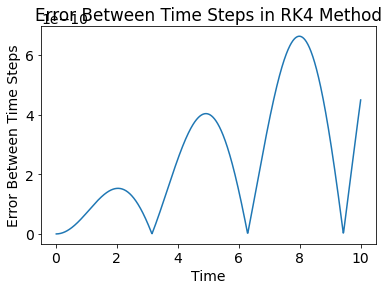

In [7]:
import numpy as np

# Define parameters
m = 1   # mass of particle
k = 1   # spring constant
x0 = 1  # initial position
v0 = 0  # initial velocity
tmax = 10  # maximum simulation time

# Define function to calculate acceleration
def acceleration(x):
    return -k/m * x

# Define function to calculate exact solution
def exact_solution(t):
    return x0*np.cos(np.sqrt(k/m)*t)

# Define function to calculate error between time steps
def step_error(n):
    # Calculate time step size
    dt = tmax / n
    
    # Initialize arrays for position and velocity
    x = np.zeros(n+1)
    v = np.zeros(n+1)

    # Set initial position and velocity
    x[0] = x0
    v[0] = v0

    # Calculate position and velocity at each time step using RK4 method
    for i in range(1, n+1):
        k1v = acceleration(x[i-1])
        k1x = v[i-1]
        k2v = acceleration(x[i-1] + 0.5*dt*k1x)
        k2x = v[i-1] + 0.5*dt*k1v
        k3v = acceleration(x[i-1] + 0.5*dt*k2x)
        k3x = v[i-1] + 0.5*dt*k2v
        k4v = acceleration(x[i-1] + dt*k3x)
        k4x = v[i-1] + dt*k3v
        
        x[i] = x[i-1] + (1/6)*(k1x + 2*k2x + 2*k3x + k4x)*dt
        v[i] = v[i-1] + (1/6)*(k1v + 2*k2v + 2*k3v + k4v)*dt

    # Calculate exact solution at each time step
    t_values = np.linspace(0, tmax, n+1)
    x_exact = exact_solution(t_values)

    # Calculate error between time steps
    step_errors = np.abs(x_exact[1:] - x[1:])

    return step_errors

# Calculate error between time steps for a specific number of time steps
n = 1000
step_errors = step_error(n-1)

# Plot error vs. time
t_values = np.linspace(0, tmax, n)
plt.plot(t_values[1:], step_errors)
plt.xlabel('Time')
plt.ylabel('Error Between Time Steps')
plt.title('Error Between Time Steps in RK4 Method')
plt.show()

## 3.1 Integrators: Background Information 

Defining the force function which will be used throught the whole mini-project. This formula represents:

The gravitational force on a mass, m1, at a point r1 due to another
mass, m2, located at a point r2, is given by:
$$
\vec F_{1,2} = \frac{G m_{1} m_{2}}{|r_{12}|^{3}} \vec r_{12}
$$

In [8]:
def force(r1,r2,m1,m2):
    """Calculation of gravitational force 
    
    Inputs:
        r1 - postion of vetor 1
        r2 - postion of vetor 2
        m1 - mass 1
        m2 - mass 2
    
    Returns:
        f_on_m1 - force on m1 at point r1 due to m2 at r2
    """
    # Find r_12 and its magnitude
    r12 = r2 - r1
    mag = np.sqrt(np.dot(r12,r12))
    f_on_m1 = (G * m1 * m2 / (mag **3)) * r12
    return f_on_m1

## 3.2 First Test: Two bodies, Different Mass

Here i am onsidering a system like a moon orbiting a planet, or a planet orbiting a star. I sterted with a large mass ratio (at least 1,000:1), setting G = 1 and m1 = 1 for the large body, and use Euler’s method. I will assume that the large body does not move, so puting it at the origin, and not updating its position; puting the small mass at r2 = 1.0

Then, working out the initial velocity for the small mass to move in a circular orbit around the large one using simple mechanics: 

$$ \frac{m_{2}v_{2}}{r_{2}} = \frac{G m_{1}m_{2}}{r_{12}^{2}}$$

The formula comes from consideration of a circular orbit which results in gravitational force which can be equated to centrepetal force giving the formula above.


I will propagate the system forward in time for
at least two orbits, recording the position and velocity at each timestep. Then illustrating trajectories in the plots at the end. I also calculated the total energy at each step (kinetic and potential), the calculation can be done either during the propagation or afterwards, but i chosen during, and findong the magnitude of the angular momentum at each timestep. Then plotting both energies and angular momentum, to check how well they are conserved, particularly with timestep size.

Angular momentum is defined as $\mathbf{L} = m\mathbf{v} \times \mathbf{r}$ which we could find using `np.cross` if we had 3D vectors, but we know that this system is confined to a plane, and have only worried about two dimensions, so we'll evaluate it as $L = m(r_xv_y - r_yv_x)$.

In [9]:
Ndim = 2 
step_sum = 10
dt = 0.01
Nsteps = int(step_sum/dt)
G = 1   

m1 = 1.0        # large mass
m2 = 0.0001     # small mass

r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))

KE_E = np.zeros((Nsteps,1))
PE_E = np.zeros((Nsteps,1))


# Initial conditions:
r2[ 0, :] = np.array((1.0 , 0.0 ))
v2[ 0, :] = np.array(( 0.0, 1.0))

step = 0
KE_E[step] = 0.5*m1*np.dot(v1[step],v1[step]) + 0.5*m2*np.dot(v2[step],v2[step])
PE_E[step] = -G*m1*m2/(np.sqrt(np.dot(r1[step] - r2[step],r1[step]-r2[step])))

for i in range(Nsteps-1):
    
    f2 = force(r2[i],r1[i],m1,m2)
    
    v2[i+1] = v2[i] + dt * f2/m2
    r2[i+1] = r2[i] + dt* v2[i]
    
    KE_E[i+1] = 0.5 * m2 * np.dot(v2[i+1],v2[i+1])
    PE_E[i+1] = -G * m1 * m2 / np.sqrt(np.dot(r1[i+1]-r2[i+1],r1[i+1]-r2[i+1]))

    

#Array for timestep 
t = np.linspace(0,Nsteps*dt,Nsteps)

#Angular momentum function 
L1z = m2*(r2[:,0]*v2[:,1] - r2[:,1]*v2[:,0])


Text(0.5, 0.98, 'Simulation of two-body problem')

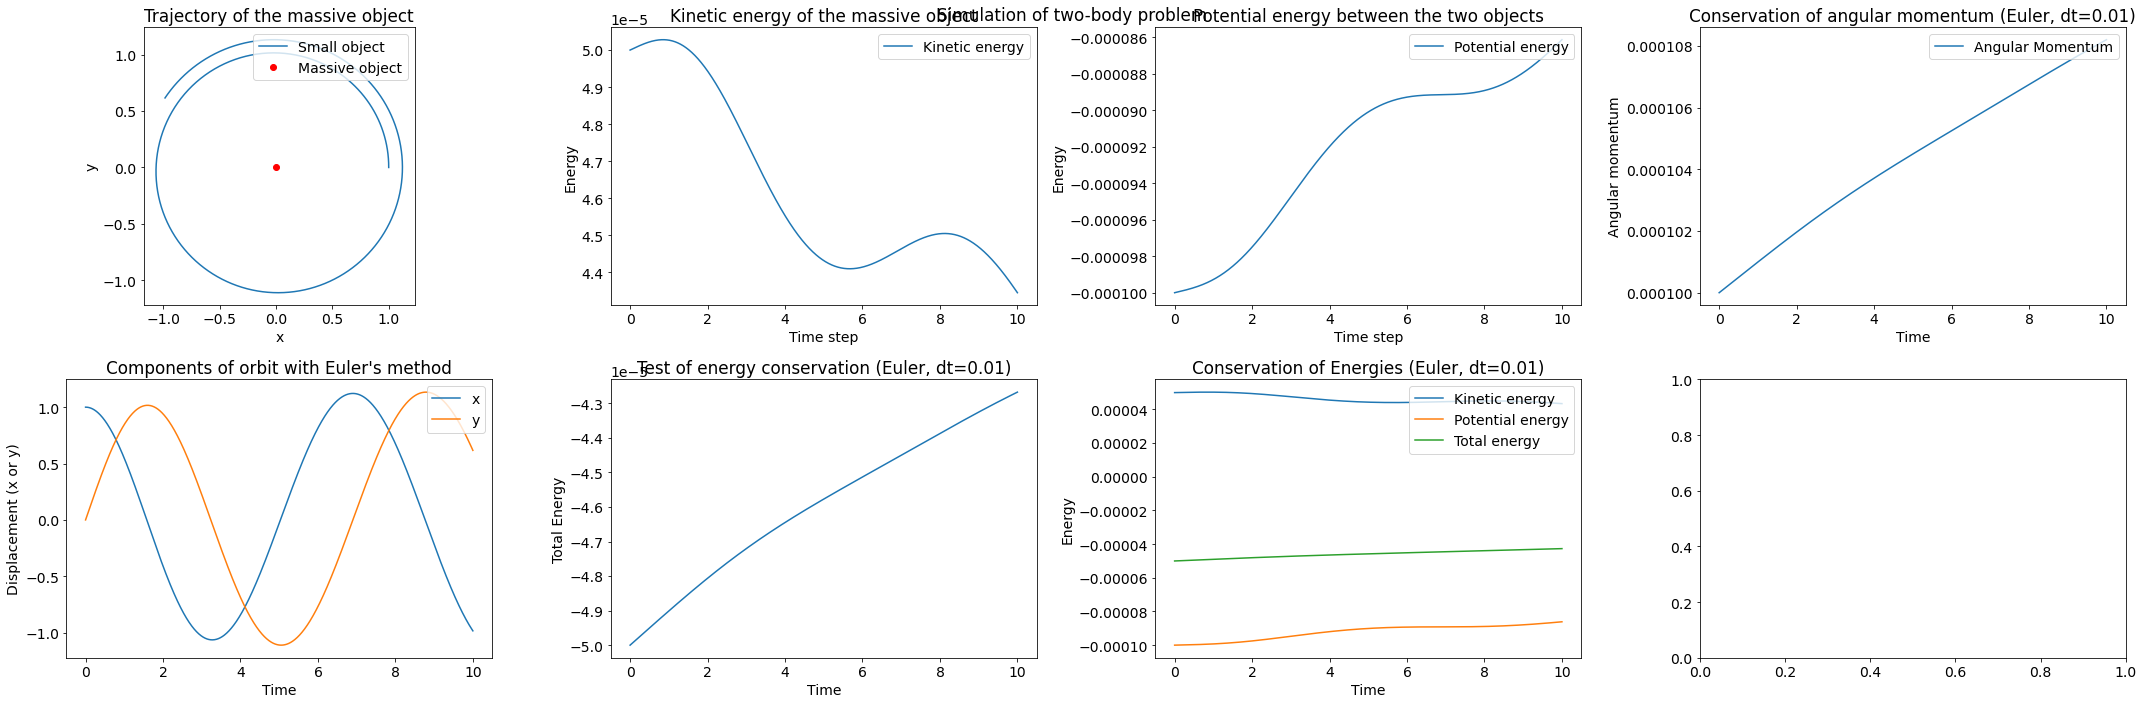

In [10]:
fig, axs = plt.subplots(2, 4, figsize=(30, 10))

#Plot the trajectory 
axs[0,0].plot(r2[:,0], r2[:,1], label='Small object')
axs[0,0].plot(0, 0, 'ro', label='Massive object')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')
axs[0,0].set_aspect('equal')
axs[0,0].legend(loc='upper right')
axs[0,0].set_title('Trajectory of the massive object')

#Plotting the displacement of x and y with time 
axs[1,0].plot(t,r2[:,0],label='x')
axs[1,0].plot(t,r2[:,1],label='y')
axs[1,0].set_xlabel("Time")
axs[1,0].set_ylabel("Displacement (x or y)")
axs[1,0].legend(loc='upper right')
axs[1,0].set_title("Components of orbit with Euler's method")


#Plot the kinetic energy 
axs[0,1].plot(t,KE_E, label='Kinetic energy')
axs[0,1].set_xlabel('Time step')
axs[0,1].set_ylabel('Energy')
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('Kinetic energy of the massive object')

#Plot the potential energy between the two objects
axs[0,2].plot(t,PE_E, label='Potential energy')
axs[0,2].set_xlabel('Time step')
axs[0,2].set_ylabel('Energy')
axs[0,2].legend(loc='upper right')
axs[0,2].set_title('Potential energy between the two objects')

#Plot the sum of Kinetic and Potential Energies 
axs[1,1].plot(t,KE_E+PE_E)
axs[1,1].set_title(f'Test of energy conservation (Euler, dt={dt})')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('Total Energy')

#Plot the Angular momentum 
axs[0,3].plot(t,L1z, label='Angular Momentum')
axs[0,3].set_xlabel('Time')
axs[0,3].set_ylabel('Angular momentum')
axs[0,3].legend(loc='upper right')
axs[0,3].set_title(f'Conservation of angular momentum (Euler, dt={dt})')

#Plot the All Energy 
axs[1,2].plot(t,KE_E, label='Kinetic energy')
axs[1,2].plot(t,PE_E, label='Potential energy')
axs[1,2].plot(t,KE_E+PE_E,label='Total energy')
axs[1,2].set_xlabel('Time')
axs[1,2].set_ylabel('Energy')
axs[1,2].legend(loc='upper right')
axs[1,2].set_title(f'Conservation of Energies (Euler, dt={dt})')

plt.tight_layout()
plt.suptitle('Simulation of two-body problem')

### Result Analysis
# -----

### Using the Verlet Method 

Text(0.5, 1.0, 'Conservation of angular momentum (Verlet, dt=0.01)')

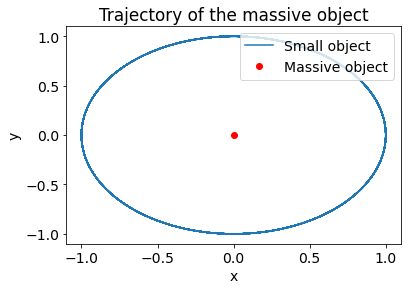

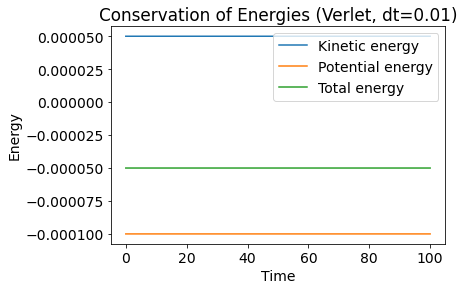

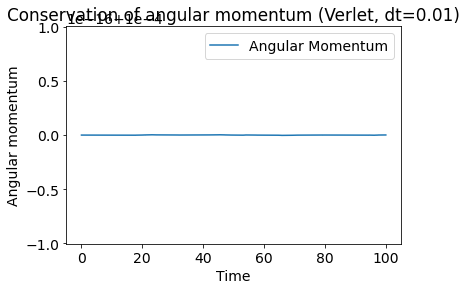

In [11]:
Ndim = 2 
step_sum = 100
dt = 0.01
Nsteps = int(step_sum/dt)
G = 1   

m1 = 1.0        # large mass
m2 = 0.0001     # small mass

r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))

KE_E = np.zeros((Nsteps,1))
PE_E = np.zeros((Nsteps,1))


# Initial conditions:
r2[ 0, :] = np.array((1.0 , 0.0 ))
v2[ 0, :] = np.array(( 0.0, 1.0))

step = 0
KE_E[step] = 0.5*m1*np.dot(v1[step],v1[step]) + 0.5*m2*np.dot(v2[step],v2[step])
PE_E[step] = -G*m1*m2/(np.sqrt(np.dot(r1[step] - r2[step],r1[step]-r2[step])))

for i in range(Nsteps-1):

    f2 = force(r2[i],r1[i],m2,m1)

    r2[i+1] = r2[i] + dt* v2[i] + dt*dt*f2/(2.0*m2) 
    
    f2_dt = force(r2[i+1],r1[i+1],m2,m1)

    v2[i+1] = v2[i] + dt * (f2 + f2_dt)/(2.0*m2)
    
    
    KE_E[i+1] = 0.5 * m2 * np.dot(v2[i+1],v2[i+1])
    PE_E[i+1] = -G * m1 * m2 / np.sqrt(np.dot(r1[i+1]-r2[i+1],r1[i+1]-r2[i+1]))

    

#Array for timestep 
t = np.linspace(0,Nsteps*dt,Nsteps)

#Angular momentum function 
L1z_ver = m2*(r2[:,0]*v2[:,1] - r2[:,1]*v2[:,0])

#Plot the trajectory 
plt.figure()
plt.plot(r2[:,0], r2[:,1], label='Small object')
plt.plot(0, 0, 'ro', label='Massive object')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.title('Trajectory of the massive object')


#Plot the All Energy 
plt.figure()
plt.plot(t,KE_E, label='Kinetic energy')
plt.plot(t,PE_E, label='Potential energy')
plt.plot(t,KE_E+PE_E,label='Total energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend(loc='upper right')
plt.title(f'Conservation of Energies (Verlet, dt={dt})')

#Plot the Angular momentum 
plt.figure()
plt.plot(t,L1z_ver, label='Angular Momentum')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.title(f'Conservation of angular momentum (Verlet, dt={dt})')

## 3.3 Second Test: Two bodies, Similar Masses

I decided to make the equations are much simpler by putting the centre of mass at the origin (rCoM = 0). Setting the distance between the bodies r12 = 1 and starting the bodies on the x-axis initially for simplicity. For initial velocities such that there were circular orbits around the centre of mass (for body 1, used m1v21/r1 = Gm1m2/r122). Propagating the system forward in time using the velocity Verlet method and Euler method at the end to compare the differences. I will calculate the energy and angular momentum as before for both bodies.

## Using Verlet Method

The equations for updating position and velocity for a given body are:

$$
x(t + \Delta t) = x(t) + \Delta t v(t) + \Delta t^{2} \frac{F(t)}{2m}
$$

$$
v(t + \Delta t) = v(t) + \Delta t \frac{F(t) + F(t + \delta t)}{2m}
$$

Both bodies will move in orbit around the their center of mass:
$$
r_{CoM} = \frac{m_{1}\vec r_{1} + m_{2}\vec r_{2} }{m_{1} + m_{2}}
$$

The distance between the bodies is set to be 1 ( so that $ x_{1} + x_{2}  =1 $) and $ X_{CoM} = 0 $ 

In [12]:
Ndim = 2 
step_sum = 10
dt = 0.01
Nsteps = int(step_sum/dt)
t = np.linspace(0,Nsteps*dt,Nsteps)

m1_v = 1.0  
m2_v = 1.0     

r1_v = np.zeros(( Nsteps , Ndim ))
v1_v = np.zeros(( Nsteps , Ndim ))

r2_v = np.zeros(( Nsteps , Ndim ))
v2_v = np.zeros(( Nsteps , Ndim ))


# Set up storage for energies
PE_E_v1 = np.zeros((Nsteps,2))
KE_E_v1 = np.zeros((Nsteps, 2))


# Initial conditions (guess)
r1_v[ 0, :] = np.array(( 0.5 , 0.0 ))
v1_v[ 0, :] = np.array(( 0.0, np.sqrt(0.5) ))

r2_v[ 0, :] = np.array(( -0.5 , 0.0 )) 
v2_v[ 0, :] = np.array(( 0.0, -np.sqrt(0.5) ))

step = 0
KE_E_v1[step,0] = 0.5*m1_v*np.dot(v1_v[step],v1_v[step])
PE_E_v1[step,0] = -G*m1_v*m2_v/(np.sqrt(np.dot(r1_v[step] - r2_v[step],r1_v[step]-r2_v[step])))

KE_E_v1[step,1] = 0.5*m2_v*np.dot(v2_v[step],v2_v[step]) 
PE_E_v1[step,1] = -G*m1_v*m2_v/(np.sqrt(np.dot(r2_v[step] - r1_v[step],r2_v[step]-r1_v[step])))

for i in range(Nsteps-1):
    
    f1_v = force(r1_v[i],r2_v[i],m1_v,m2_v) #Force of masse at normal dt 
    f2_v = force(r2_v[i],r1_v[i],m2_v,m1_v)

    r1_v[i+1] = r1_v[i] + dt* v1_v[i] + dt*dt*f1_v/(2.0*m1_v) 
    r2_v[i+1] = r2_v[i] + dt* v2_v[i] + dt*dt*f2_v/(2.0*m2_v) 
    
    f1_v_dt = force(r1_v[i+1],r2_v[i+1],m1_v,m2_v) #Force of masse at dt forward  
    f2_v_dt = force(r2_v[i+1],r1_v[i+1],m2_v,m1_v)
    
    v1_v[i+1] = v1_v[i] + dt * (f1_v + f1_v_dt)/(2.0*m1_v) #Velocity at dt foward 
    v2_v[i+1] = v2_v[i] + dt * (f2_v + f2_v_dt)/(2.0*m2_v)
    
    KE_E_v1[i+1,0] = 0.5 * m1_v * np.dot(v1_v[i+1],v1_v[i+1])
    PE_E_v1[i+1,0] = -G * m1_v * m2_v / np.sqrt(np.dot(r1_v[i+1]-r2_v[i+1],r1_v[i+1]-r2_v[i+1]))
    
    KE_E_v1[i+1,1] = 0.5 * m2_v * np.dot(v2_v[i+1],v2_v[i+1])
    PE_E_v1[i+1,1] = -G * m1_v * m2_v / np.sqrt(np.dot(r2_v[i+1]-r1_v[i+1],r2_v[i+1]-r1_v[i+1]))
    
    
#Angular momentum function 
L1z_v1 = m2_v*(r2_v[:,0]*v2_v[:,1] - r2_v[:,1]*v2_v[:,0])
L1z_v2 = m1_v*(r1_v[:,0]*v1_v[:,1] - r1_v[:,1]*v1_v[:,0])

Text(0.5, 1.0, 'Conservation of Angular Momentum ')

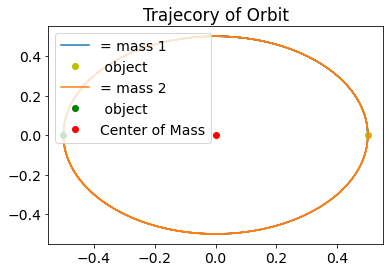

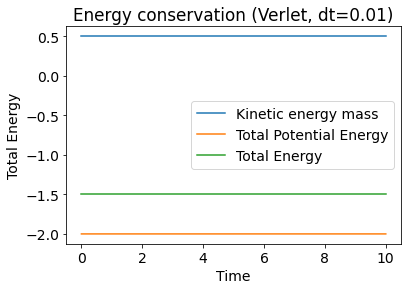

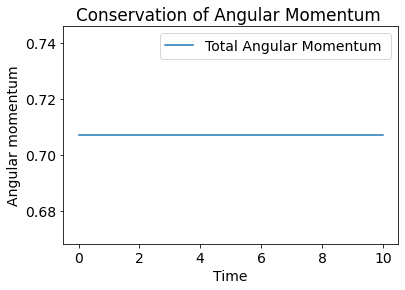

In [13]:
plt.figure()
plt.plot(r1_v[:,0],r1_v[:,1], label = '= mass 1')
plt.plot(r1_v[0,0],r1_v[0,1],'yo', label=' object')
plt.plot(r2_v[:,0],r2_v[:,1], label = '= mass 2')
plt.plot(r2_v[0,0],r2_v[0,1],'go', label=' object')
plt.plot(0, 0, 'ro', label='Center of Mass')
plt.title("Trajecory of Orbit")
plt.legend(loc='upper left')

#Plot the sum of Kinetic and Potential Energies 
plt.figure()
plt.plot(t,KE_E_v1[:,0]+KE_E_v1[:,1], label='Kinetic energy mass ')
plt.plot(t,PE_E_v1[:,0]+PE_E_v1[:,1], label='Total Potential Energy')
plt.plot(t,KE_E_v1[:,1]+PE_E_v1[:,1]+KE_E_v1[:,0]+PE_E_v1[:,0], label='Total Energy ')
plt.title(f'Energy conservation (Verlet, dt={dt})')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.legend()

plt.figure()
plt.plot(t,np.round(L1z_v1+L1z_v2,5), label='Total Angular Momentum ')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.title('Conservation of Angular Momentum ')

Text(0.5, 0.98, 'Simulation of two-body problem')

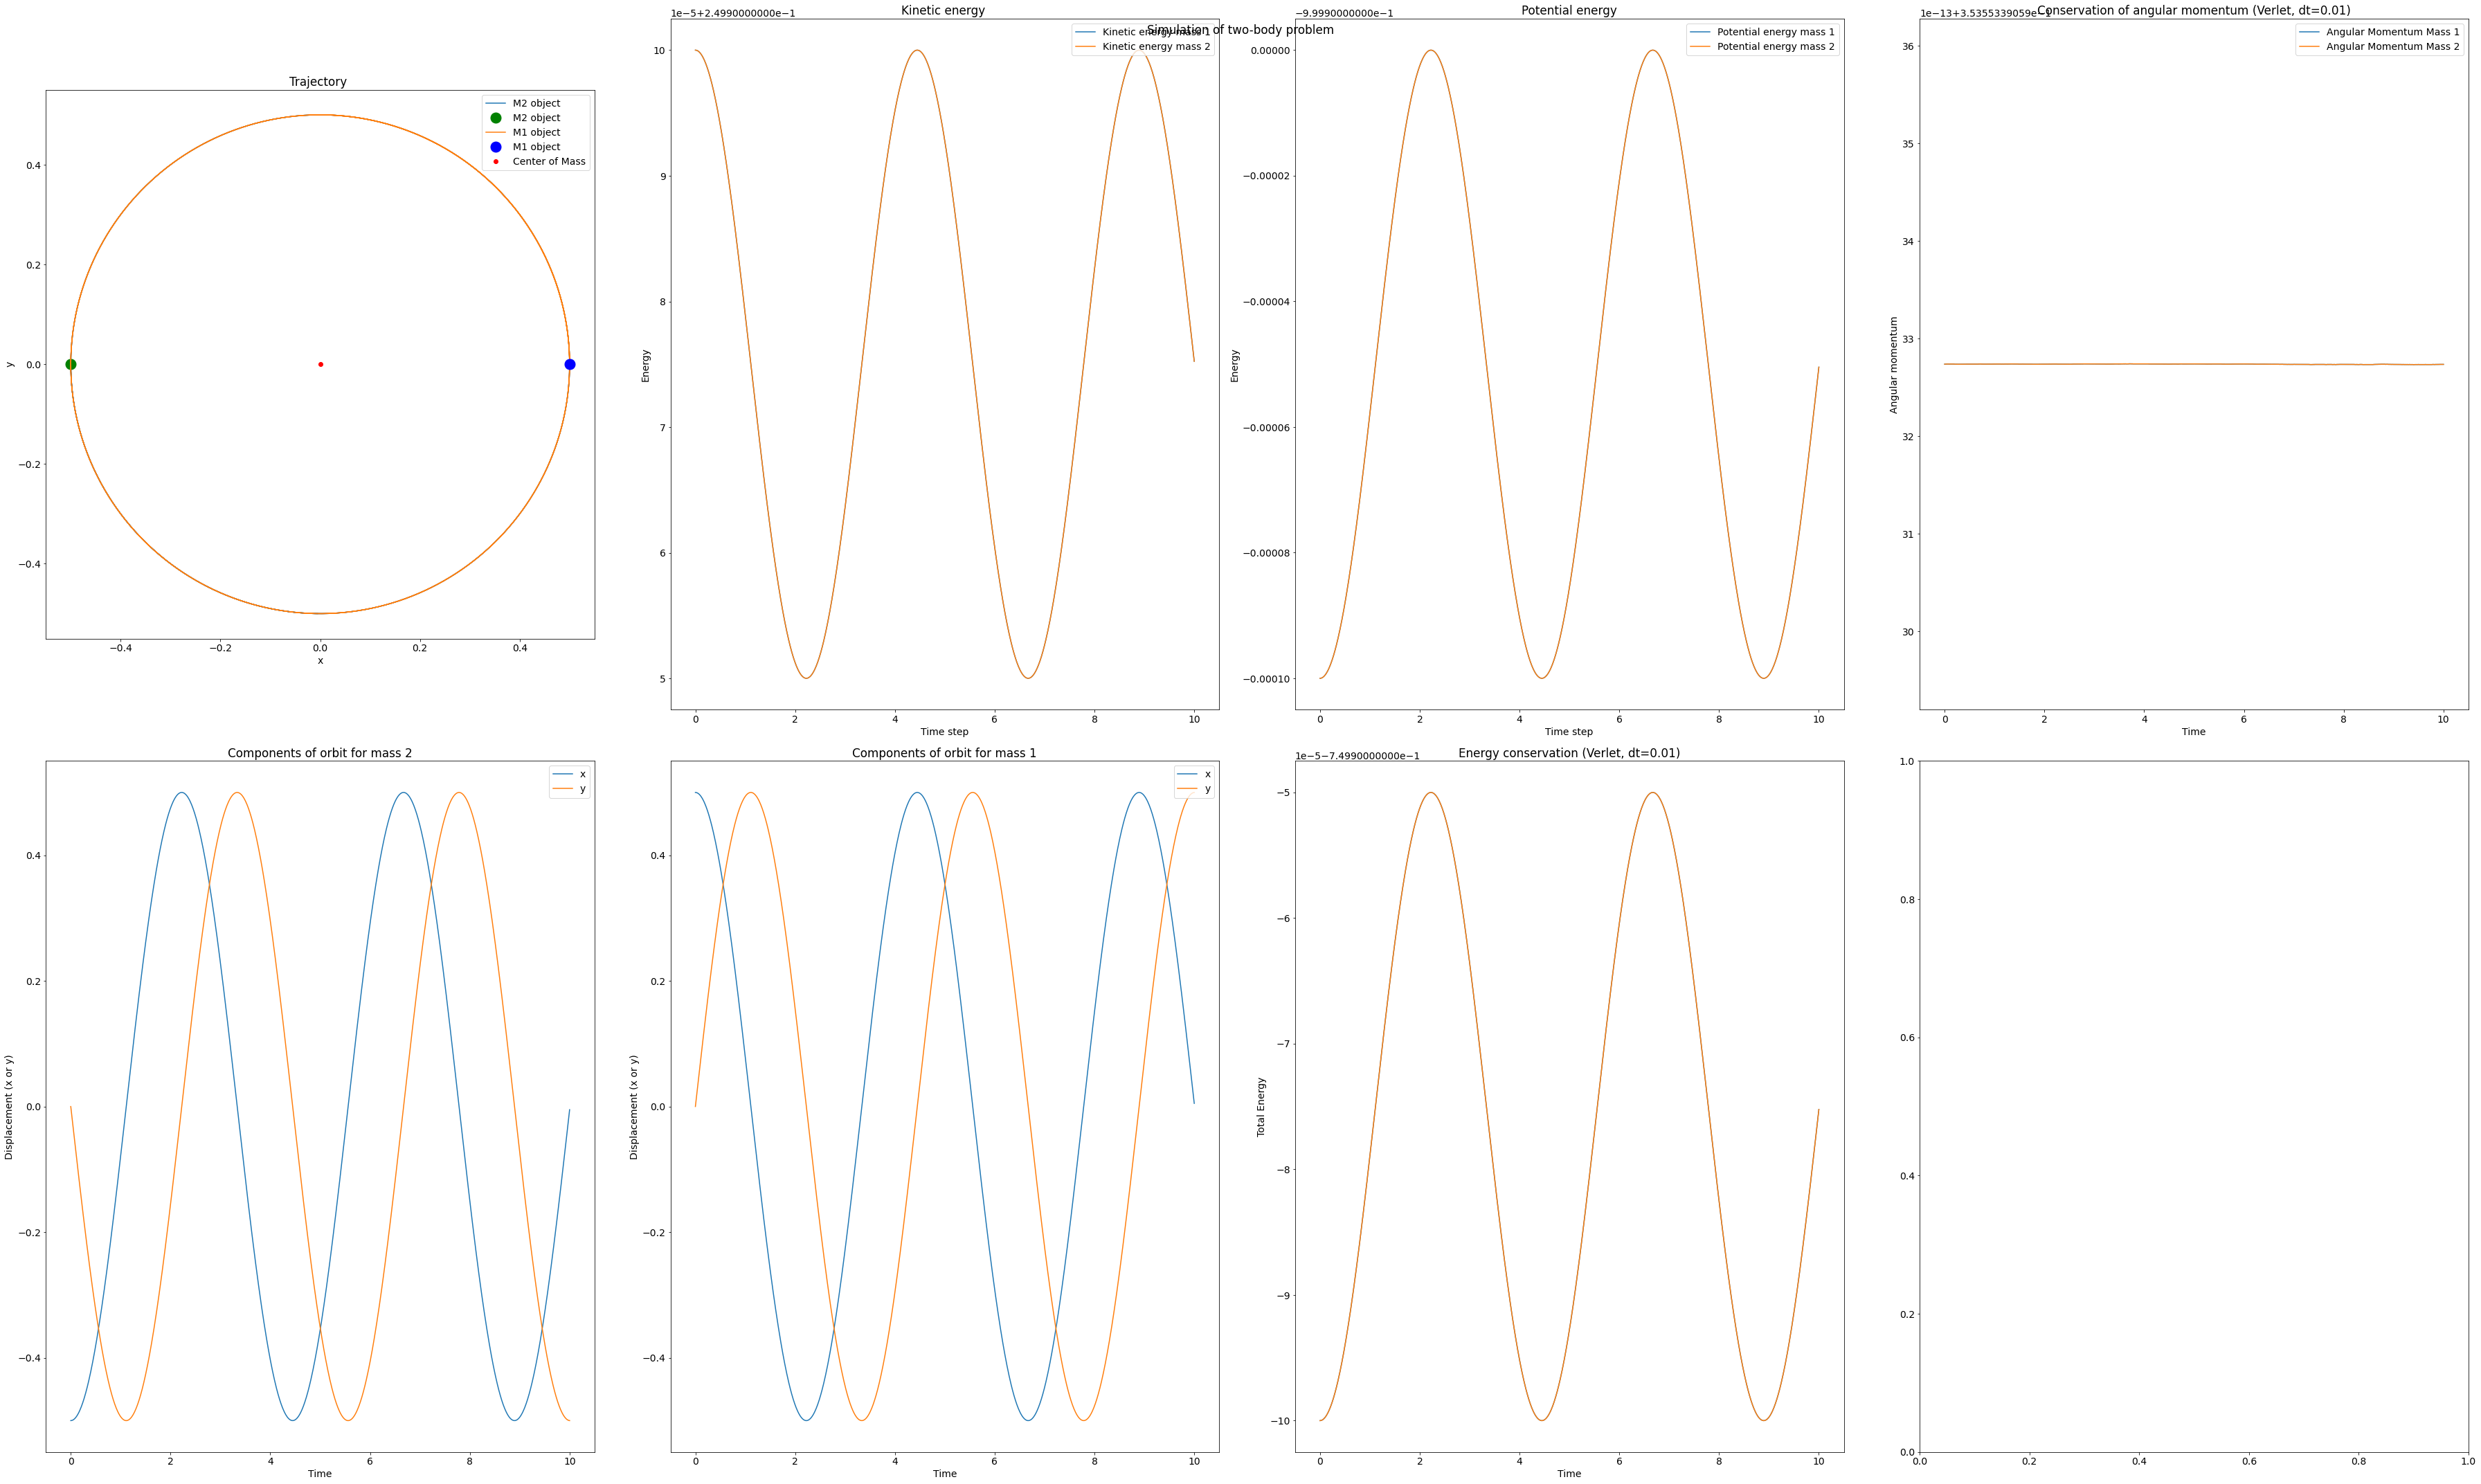

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(50, 30))

#Plot the trajectory 
axs[0,0].plot(r2_v[:,0], r2_v[:,1],label='M2 object')
axs[0,0].plot(r2_v[0,0],r2_v[0,1],'go', markersize=15,label='M2 object')
axs[0,0].plot(r1_v[:,0], r1_v[:,1], label='M1 object')
axs[0,0].plot(r1_v[0,0],r1_v[0,1],'bo',markersize=15, label='M1 object')
axs[0,0].plot(0, 0, 'ro', label='Center of Mass')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')
axs[0,0].set_aspect('equal')
axs[0,0].legend(loc='upper right')
axs[0,0].set_title('Trajectory ')

#Plotting the displacement of x and y with time 
axs[1,0].plot(t,r2_v[:,0],label='x')
axs[1,0].plot(t,r2_v[:,1],label='y')
axs[1,0].set_xlabel("Time")
axs[1,0].set_ylabel("Displacement (x or y)")
axs[1,0].legend(loc='upper right')
axs[1,0].set_title("Components of orbit for mass 2")

axs[1,1].plot(t,r1_v[:,0],label='x')
axs[1,1].plot(t,r1_v[:,1],label='y')
axs[1,1].set_xlabel("Time")
axs[1,1].set_ylabel("Displacement (x or y)")
axs[1,1].legend(loc='upper right')
axs[1,1].set_title("Components of orbit for mass 1")

#Plot the kinetic energy 
axs[0,1].plot(t,KE_E_v1[:,0], label='Kinetic energy mass 1')
axs[0,1].plot(t,KE_E_v1[:,1], label='Kinetic energy mass 2')
axs[0,1].set_xlabel('Time step')
axs[0,1].set_ylabel('Energy')
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('Kinetic energy ')

#Plot the potential energy between the two objects
axs[0,2].plot(t,PE_E_v1[:,0], label='Potential energy mass 1')
axs[0,2].plot(t,PE_E_v1[:,1], label='Potential energy mass 2')
axs[0,2].set_xlabel('Time step')
axs[0,2].set_ylabel('Energy')
axs[0,2].legend(loc='upper right')
axs[0,2].set_title('Potential energy')

#Plot the sum of Kinetic and Potential Energies 
axs[1,2].plot(t,KE_E_v1[:,0]+PE_E_v1[:,0])
axs[1,2].plot(t,KE_E_v1[:,1]+PE_E_v1[:,1])
axs[1,2].set_title(f'Energy conservation (Verlet, dt={dt})')
axs[1,2].set_xlabel('Time')
axs[1,2].set_ylabel('Total Energy')

#Plot the Angular momentum 
axs[0,3].plot(t,L1z_v1, label='Angular Momentum Mass 1')
axs[0,3].plot(t,L1z_v2, label='Angular Momentum Mass 2')
axs[0,3].set_xlabel('Time')
axs[0,3].set_ylabel('Angular momentum')
axs[0,3].legend(loc='upper right')
axs[0,3].set_title(f'Conservation of angular momentum (Verlet, dt={dt})')


plt.tight_layout()
plt.suptitle('Simulation of two-body problem')

### Result Analysis 

## ---

## Using Euler Method 

Text(0.5, 1.0, 'Conservation of angular momentum (Euler, dt=0.01)')

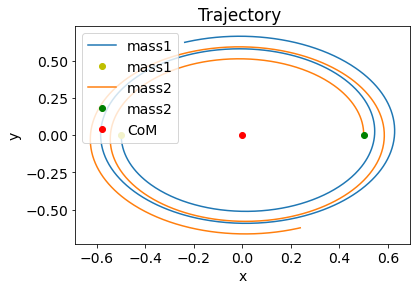

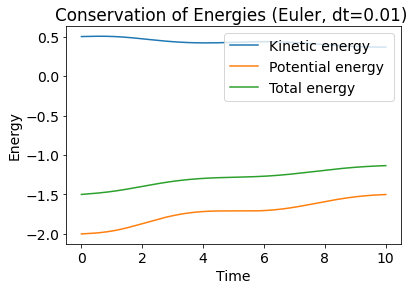

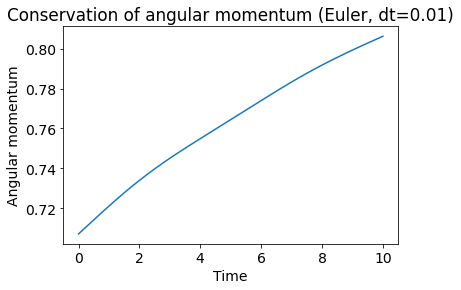

In [15]:
Ndim = 2 
step_sum = 10
dt = 0.01
Nsteps = int(step_sum/dt)
G = 1   
t = np.linspace(0,Nsteps*dt,Nsteps)

m1 = 1.0        # large mass
m2 = 1.0     # small mass

r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))

KE_E_e = np.zeros((Nsteps,2))
PE_E_e = np.zeros((Nsteps,2))


# Initial conditions:
r1[0] = np.array(( -0.5 , 0.0 ))
v1[0] = np.array(( 0.0, -np.sqrt(0.5)))

r2[0] = np.array([0.5, 0.0]) 
v2[0] = np.array([0.0, np.sqrt(0.5)])

step = 0
KE_E_e[step,0] = 0.5*m1_v*np.dot(v1[step],v1[step])
PE_E_e[step,0] = -G*m1*m2/(np.sqrt(np.dot(r1[step] - r2[step],r1[step]-r2[step])))

KE_E_e[step,1] = 0.5*m2*np.dot(v2[step],v2[step]) 
PE_E_e[step,1] = -G*m1*m2/(np.sqrt(np.dot(r2[step] - r1[step],r2[step]-r1[step])))

for i in range(Nsteps-1):
    
    f2 = force(r2[i],r1[i],m2,m1)
    f1 = force(r1[i],r2[i],m1,m2)
    
    v1[i+1] = v1[i] + dt * f1/m1
    r1[i+1] = r1[i] + dt* v1[i]
    
    v2[i+1] = v2[i] + dt * f2/m2
    r2[i+1] = r2[i] + dt* v2[i]
    
    KE_E_e[i+1,0] = 0.5 * m1 * np.dot(v1[i+1],v1[i+1])
    PE_E_e[i+1,0] = -G * m1 * m2 / np.sqrt(np.dot(r1[i+1]-r2[i+1],r1[i+1]-r2[i+1]))
    
    KE_E_e[i+1,1] = 0.5 * m2 * np.dot(v2[i+1],v2[i+1])
    PE_E_e[i+1,1] = -G * m1 * m2 / np.sqrt(np.dot(r2[i+1]-r1[i+1],r2[i+1]-r1[i+1]))
    
    
#Angular momentum function 
L1z1_e = m2*(r2[:,0]*v2[:,1] - r2[:,1]*v2[:,0])
L1z2_e = m1*(r1[:,0]*v1[:,1] - r1[:,1]*v1[:,0])

plt.figure() 
plt.plot(r1[:,0],r1[:,1], label = 'mass1')
plt.plot(r1[0,0],r1[0,1],'yo', label='mass1')
plt.plot(r2[:,0],r2[:,1], label = 'mass2')
plt.plot(r2[0,0],r2[0,1],'go', label='mass2')
plt.plot(0,0, 'ro',label="CoM")
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory ')

plt.figure()
plt.plot(t,KE_E_e[:,0]+KE_E_e[:,1], label='Kinetic energy ')
plt.plot(t,PE_E_e[:,0]+PE_E_e[:,1], label='Potential energy ')
plt.plot(t,KE_E_e[:,0]+PE_E_e[:,0]+KE_E_e[:,1]+PE_E_e[:,1],label='Total energy ')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend(loc='upper right')
plt.title(f'Conservation of Energies (Euler, dt={dt}) ')


plt.figure()
plt.plot(t,L1z1_e+L1z2_e)
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.title(f'Conservation of angular momentum (Euler, dt={dt})')

### Result Analysis 

## ---

## 3.4 Three Bodies 

Here I will be defining new set of force function as my number of bodies increased to 3.

$\texttt{force_3_body}$ is a function that calculates the gravitational forces on three celestial bodies, given their positions and masses. It returns the forces acting on each planet as separate variables.

$\texttt{accel_3_body}$ is a function that calculates the accelerations of three celestial bodies, given their positions and masses. It calls the $\texttt{force_3_body}$ function to get the forces acting on each planet, and then divides each force by the mass of the corresponding planet to obtain the acceleration. It returns the accelerations acting on each planet as separate variables.

In [16]:
def force(r1,r2,m1,m2):
    """
    Calculates the gravitational force between two celestial bodies.

    Parameters:
    r1, r2 : The x, y, and z coordinates of the positions of the two celestial bodies, in meters.
    m1, m2 : The masses of the two celestial bodies, in kilograms.

    Returns: Gravitational force on the first body due to the second body.
    
    The force is calculated using the gravitational force formula.
    """

    r12 = r2 - r1
    mag = np.sqrt(np.dot(r12,r12))
    f_on_m1 = (G * m1 * m2 / (mag **3)) * r12
    return f_on_m1

def force_3_body(r1,r2,r3,m1,m2,m3):
    """
    Calculates the net gravitational force exerted on each of the three bodies in a three-body system.

    Parameters:
    r1, r2, r3 : The x, y, and z coordinates of the positions of the three celestial bodies, in meters.
    m1, m2, m3 : The masses of the three celestial bodies, in kilograms.

    Returns: Net force on each body:
    force_planet_1, force_planet_2, force_planet_3
    
    The force is calculated using the gravitational force formula between each pair of bodies.
    """
    
    force_planet_1 = 0.0 #force(r1,r2,m1,m2) #+ force(r1,r3,m1,m3)
    force_planet_2 = force(r2,r1,m2,m1) #+ force(r2,r3,m2,m3)
    force_planet_3 = force(r3,r2-r2,m3,m2)  #+force(r3,r1,m3,m1)
    
    return force_planet_1,force_planet_2,force_planet_3

def accel_3_body(r1,r2,r3,m1,m2,m3):
    """
    Calculates the acceleration of each of the three bodies in a three-body system.

    Parameters:
    r1, r2, r3 : The x, y, and z coordinates of the positions of the three celestial bodies, in meters.
    m1, m2, m3 : The masses of the three celestial bodies, in kilograms.

    Returns: Acceleration of each body: acc1, acc2, acc3
    
    The acceleration is calculated by dividing the net force on each body by its mass,
    which is obtained from the `force_3_body` function.
    """
    force_p1, force_p2, force_p3 = force_3_body(r1,r2,r3,m1,m2,m3)
    
    acc1 = force_p1/m1 
    acc2 = force_p2/m2 
    acc3 = force_p3/m3 
    
    return acc1, acc2, acc3

I will consider a three body problem, there are several difficulties with initialising and propagating the system.
I will be considering a system of a star, a planet and a moon, with masses m1 = 1, m2 = 3×10−6 and m3 = 3.6×10−8 (again with G=1). Setting r12 = 1 and r23 = 0.0025. Starting the bodies aligned along an axis, choosing a suitable origin and calculating appropriate initial velocities. A simple approximation would be to set v1 = 0, and finding v2 using the from using the centrepetal force as planet is orbiting the star, ignoring the effects of m3. Then finding the velocity of m3 relative to m2 by considering the orbit of m3 about m2 (ignoring the influence of m1). In order for moon to orbit the planet, I have implemented the shifts in the radius of the orbit, so that the earth will be at the center of the new system and moon orbiting it as a 2 planet system done before. Working with center of mass will be in the next session.


The initial velocity for the small body is found by solving:

$$
m_1v_1^2/r_1 = Gm_1m_2/r_{12}^2
$$
simplifies to 
$$v_1 = \sqrt{Gm_2r_1/r_{12}^2}$$

In [17]:
Ndim = 2
step_sum = 10
dt = 0.001
Nsteps = int(step_sum/dt)
G = 1   

t = np.linspace(0,Nsteps*dt,Nsteps)

m1 = 1.0      #Star  
m2 = 3e-6     #Planet
m3 = 3.6e-8   #Moon

#Storate of position velocity acceleration and energys
r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
r3 = np.zeros((Nsteps,Ndim))

v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))
v3 = np.zeros((Nsteps,Ndim))

acc1 = np.zeros((Nsteps,Ndim))
acc2 = np.zeros((Nsteps,Ndim))
acc3 = np.zeros((Nsteps,Ndim))

pe1_p1 = np.zeros((Nsteps,3))
ke1_p1 = np.zeros((Nsteps, 3))

#Initial conditions
r1_0 = np.array((0.0,0.0))
r2_0 = np.array((1.0,0.0))
r3_0 = np.array((1.0025,0.0))

v1_0 = np.array((0.0,0.0)) #Large object at center 
v2_0 = np.array((0.0,1.0)) # Using the formula above 
v3_0 = np.array((0.0,(np.sqrt(3))/50)) 


# Putting initial conditions into storage 
r1[0] = r1_0 
r2[0] = r2_0
r3[0] = r3_0

v1[0] = v1_0
v2[0] = v2_0 
v3[0] = v3_0

acc1[0], acc2[0] , acc3[0] = accel_3_body(r1[0],r2[0],r3[0],m1,m2,m3)

# Initial energies 
step = 0
ke1_p1[step,0] = 0.5*m1*np.dot(v1[step],v1[step])
pe1_p1[step,0] = -G*m1*m2/(np.sqrt(np.dot(r1[step] - r2[step],r1[step]-r2[step]))) -G*m1*m3/(np.sqrt(np.dot(r1[step] - r3[step],r1[step]-r3[step])))

ke1_p1[step,1] = 0.5*m2*np.dot(v2[step],v2[step]) 
pe1_p1[step,1] = -G*m1*m2/(np.sqrt(np.dot(r2[step] - r1[step],r2[step]-r1[step])))-G*m3*m2/(np.sqrt(np.dot(r2[step] - r3[step],r2[step]-r3[step])))

ke1_p1[step,2] = 0.5*m3*np.dot(v3[step],v3[step]) 
pe1_p1[step,2] = -G*m3*m1/(np.sqrt(np.dot(r3[step] - r1[step],r3[step]-r1[step])))-G*m3*m2/(np.sqrt(np.dot(r3[step] - r2[step],r3[step]-r2[step])))

r3 -= r2

for i in range(Nsteps-1):
    
    #acceleration at current step
    acc1[i], acc2[i] , acc3[i] = accel_3_body(r1[i],r2[i],r3[i],m1,m2,m3)

    #r1[i+1] = r1[i] + dt* v1[i] + dt*dt*0.5*acc1[i]
    r2[i+1] = r2[i] + dt* v2[i] + dt*dt*0.5*acc2[i]
    r3[i+1] = r3[i] + dt* v3[i] + dt*dt*0.5*acc3[i]
    
    # acceleration at next step
    acc1[i+1], acc2[i+1], acc3[i+1] = accel_3_body(r1[i+1],r2[i+1],r3[i+1],m1,m2,m3)
    
    #v1[i+1] = v1[i] + dt * (acc1[i+1] + acc1[i])/2
    v2[i+1] = v2[i] + dt * (acc2[i] + acc2[i+1])/2
    v3[i+1] = v3[i] + dt * (acc3[i] + acc3[i+1])/2 

    ke1_p1[i+1,0] = 0.5*m1*np.dot(v1[i+1],v1[i+1])
    pe1_p1[i+1,0] = -G*m1*m2/(np.sqrt(np.dot(r1[i+1] - r2[i+1],r1[i+1]-r2[i+1]))) - G*m1*m3/(np.sqrt(np.dot(r1[i+1] - r3[i+1],r1[i+1]-r3[i+1])))

    ke1_p1[i+1,1] = 0.5*m2*np.dot(v2[i+1],v2[i+1]) 
    pe1_p1[i+1,1] = -G*m1*m2/(np.sqrt(np.dot(r2[i+1] - r1[i+1],r2[i+1]-r1[i+1]))) - G*m3*m2/(np.sqrt(np.dot(r2[i+1] - r3[i+1],r2[i+1]-r3[i+1])))

    ke1_p1[i+1,2] = 0.5*m3*np.dot(v3[i+1],v3[i+1]) 
    pe1_p1[i+1,2] = -G*m3*m1/(np.sqrt(np.dot(r3[i+1] - r1[i+1],r3[i+1]-r1[i+1]))) - G*m3*m2/(np.sqrt(np.dot(r3[i+1] - r2[i+1],r3[i+1]-r2[i+1])))

    
r3 += r2
    
# Calculate the z-component of the angular momentum for each planet
Lz1p3 = m1*(r1[:,0]*v1[:,1] - r1[:,1]*v1[:,0])
Lz2p3 = m2*(r2[:,0]*v2[:,1] - r2[:,1]*v2[:,0])
Lz3p3 = m3*(r3[:,0]*v3[:,1] - r3[:,1]*v3[:,0])

# Calculate the total angular momentum
Lz_total = Lz1p3 + Lz2p3 + Lz3p3

# Total Kinetic Energy 

ke_tot = ke1_p1[:,0] + ke1_p1[:,1] + ke1_p1[:,2]
# Total Potential Energy 
pe_tot = pe1_p1[:,0] + pe1_p1[:,1] + pe1_p1[:,2]


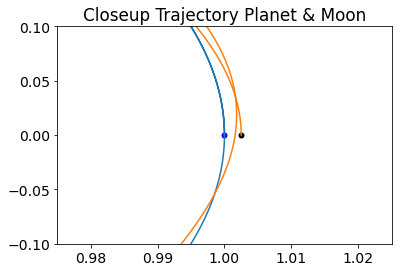

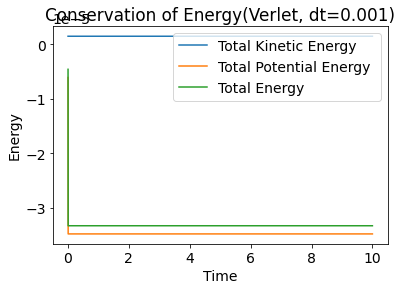

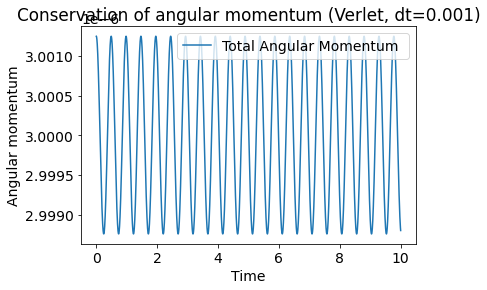

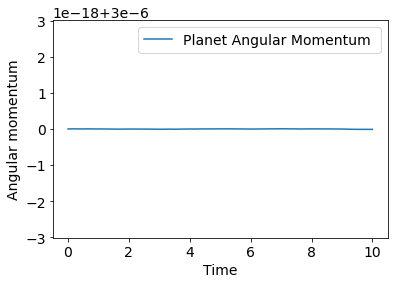

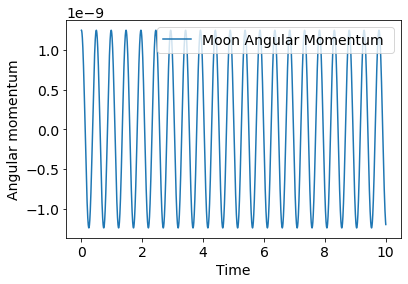

In [18]:
plt.figure()
plt.plot(r2[0,0],r2[0,1],'bo', markersize=5,label='M2 object')
plt.plot(r2[:,0], r2[:,1],label='M2 object')
plt.plot(r3[0,0],r3[0,1],'ko',markersize=5, label='M3 object')
plt.plot(r3[:,0], r3[:,1], label='M3 object')
plt.plot(0, 0, 'ro', label='Center of Mass')
plt.xlim(0.975, 1.025)  
plt.ylim(-0.1, 0.1)
# plt.legend(loc='upper left')
plt.title('Closeup Trajectory Planet & Moon')
plt.show()

plt.figure()
plt.plot(t,ke_tot, label='Total Kinetic Energy ')
plt.plot(t,pe_tot, label='Total Potential Energy ')
plt.plot(t,pe_tot+ke_tot, label='Total Energy ')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend(loc='upper right')
plt.title(f'Conservation of Energy(Verlet, dt={dt})')
plt.show()

plt.figure()
plt.plot(t,Lz_total, label='Total Angular Momentum ')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.title(f'Conservation of angular momentum (Verlet, dt={dt})')
plt.show()

plt.figure()
plt.plot(t,Lz2p3 , label='Planet Angular Momentum ')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.show()

plt.figure()
plt.plot(t,Lz3p3 , label='Moon Angular Momentum ')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.show()

From the graph above, we can see that moon is orbiting the planet. Increasing the number of steps increases the number of moon orbits. I can also investigate the shift of orbit of the moon as it orbits the planet. Hopefully will see some shifts.

Text(0.5, 1.0, 'Conservation of angular momentum (Verlet, dt=0.001)')

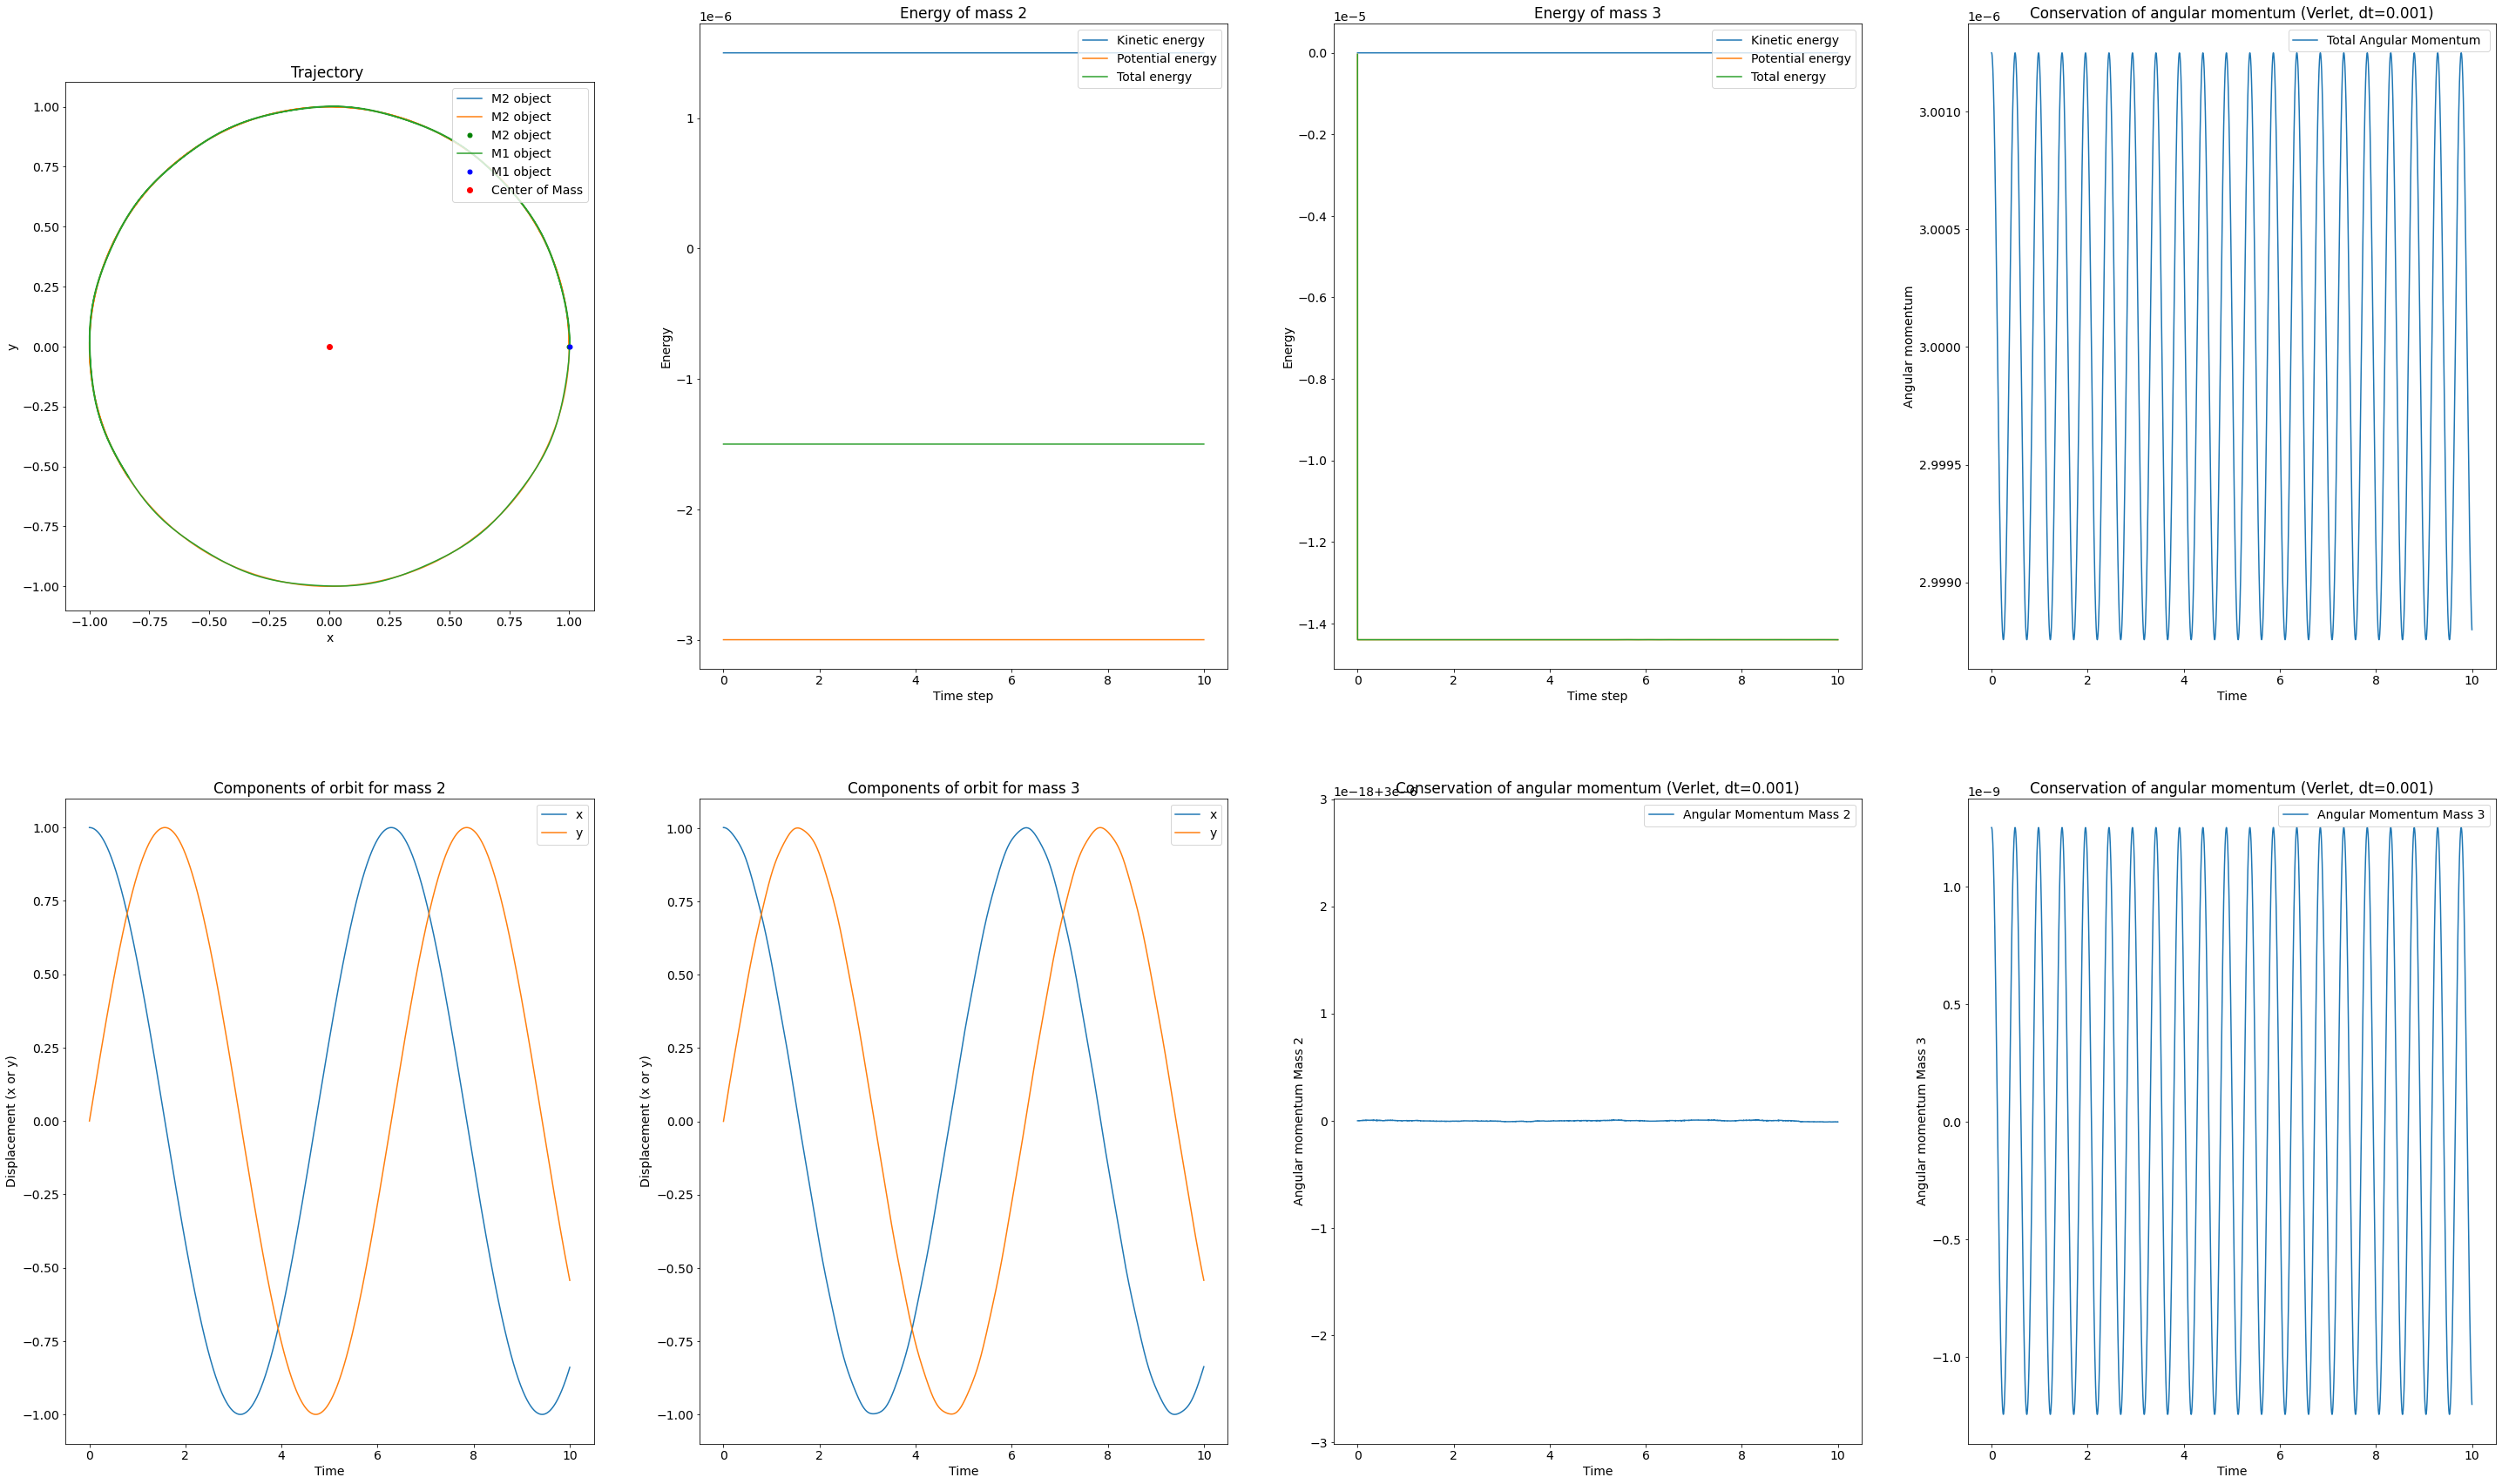

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(50, 30))

#Ploting the trajectory 
axs[0,0].plot(r1[:,0], r1[:,1],label='M2 object')
axs[0,0].plot(r2[:,0], r2[:,1],label='M2 object')
axs[0,0].plot(r2[0,0],r2[0,1],'go', markersize=5,label='M2 object')
axs[0,0].plot(r3[:,0], r3[:,1], label='M1 object')
axs[0,0].plot(r3[0,0],r3[0,1],'bo',markersize=5, label='M1 object')
axs[0,0].plot(0, 0, 'ro', label='Center of Mass')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')
axs[0,0].set_aspect('equal')
axs[0,0].legend(loc='upper right')
axs[0,0].set_title('Trajectory ')

#Plotting the displacement of x and y with time 
axs[1,0].plot(t,r2[:,0],label='x')
axs[1,0].plot(t,r2[:,1],label='y')
axs[1,0].set_xlabel("Time")
axs[1,0].set_ylabel("Displacement (x or y)")
axs[1,0].legend(loc='upper right')
axs[1,0].set_title("Components of orbit for mass 2")

axs[1,1].plot(t,r3[:,0],label='x')
axs[1,1].plot(t,r3[:,1],label='y')
axs[1,1].set_xlabel("Time")
axs[1,1].set_ylabel("Displacement (x or y)")
axs[1,1].legend(loc='upper right')
axs[1,1].set_title("Components of orbit for mass 3")

#Ploting enegry mass 2
axs[0,1].plot(t,ke1_p1[:,1], label='Kinetic energy')
axs[0,1].plot(t,pe1_p1[:,1], label='Potential energy')
axs[0,1].plot(t,ke1_p1[:,1]+pe1_p1[:,1], label='Total energy')
axs[0,1].set_xlabel('Time step')
axs[0,1].set_ylabel('Energy')
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('Energy of mass 2')

#Ploting energy mass 3
axs[0,2].plot(t,ke1_p1[:,2], label='Kinetic energy')
axs[0,2].plot(t,pe1_p1[:,2], label='Potential energy')
axs[0,2].plot(t,ke1_p1[:,2]+pe1_p1[:,2], label='Total energy')
axs[0,2].set_xlabel('Time step')
axs[0,2].set_ylabel('Energy')
axs[0,2].legend(loc='upper right')
axs[0,2].set_title('Energy of mass 3')

#Ploting the Angular momentum mass2
axs[1,2].plot(t,Lz2p3, label='Angular Momentum Mass 2')
axs[1,2].set_xlabel('Time')
axs[1,2].set_ylabel('Angular momentum Mass 2')
axs[1,2].legend(loc='upper right')
axs[1,2].set_title(f'Conservation of angular momentum (Verlet, dt={dt})')

#Ploting the Angular momentum mass3
axs[1,3].plot(t,Lz3p3, label='Angular Momentum Mass 3')
axs[1,3].set_xlabel('Time')
axs[1,3].set_ylabel('Angular momentum Mass 3')
axs[1,3].legend(loc='upper right')
axs[1,3].set_title(f'Conservation of angular momentum (Verlet, dt={dt})')

#Ploting the Total Angular momentum of mass3 and mass2
axs[0,3].plot(t,Lz_total, label='Total Angular Momentum ')
axs[0,3].set_xlabel('Time')
axs[0,3].set_ylabel('Angular momentum')
axs[0,3].legend(loc='upper right')
axs[0,3].set_title(f'Conservation of angular momentum (Verlet, dt={dt})')

### Result Analysis 

# ------


A more accurate approximation will be used below, but its a little harder to work out. I will be considering the orbit of a combined mass m23 = m2 + m3 about m1 (the combined m23 will be located at the centre of mass of m2 and m3, and m1 and m23 will orbit the centre of mass of the entire system) and then consider the orbit of m2 and m3 about their centre of mass. 

propagating the system for at leat two orbits of m2 about m1 using velocity Verlet method.

### Between Sun and COM of Earth and Moon

In [20]:
def initial_velocity(r1,r2,m1,m2):
    
    r12 = r2-r1
    mag =  np.sqrt(np.dot(r12,r12))
    v1 = np.sqrt(G*m2*m2/((mag)*(m1+m2)))
    return v1 


def center_of_mass(r1,r2,m1,m2):
    return (m1*r1+m2*r2)/(m1+m2)


def force(r1,r2,m1,m2):
    r12 = r2 - r1
    mag = np.sqrt(np.dot(r12,r12))
    f_on_m1 = (G * m1 * m2 / (mag **3)) * r12
    return f_on_m1

The initial_velocity function calculates the initial velocity of an object required to achieve a circular orbit around another object, given the positions and masses of both objects. The center_of_mass function calculates the center of mass of two objects given their positions and masses.

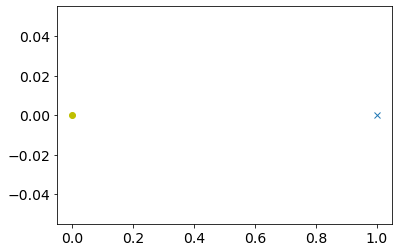

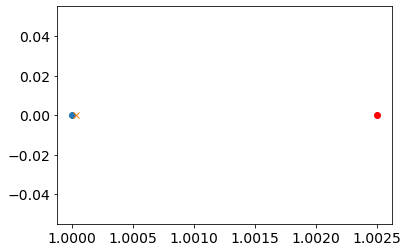

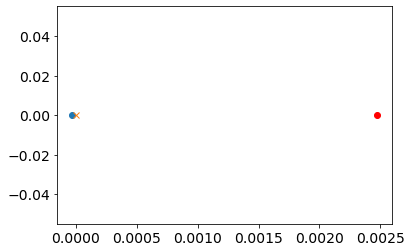

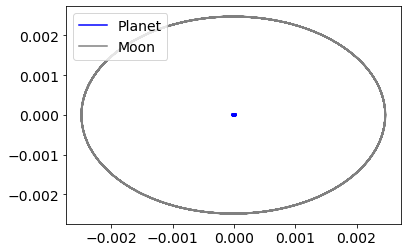

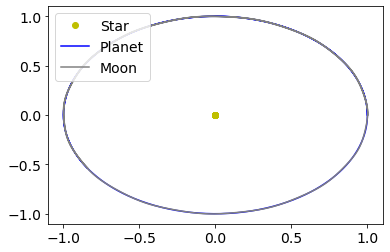

In [21]:
Ndim = 2
step_sum = 10
dt = 0.01
Nsteps = int(step_sum/dt)
G = 1   

m1 = 1.0      #Star  
m2 = 3e-6     #Planet
m3 = 3.6e-8   #Moon
m23 = m2 + m3

r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
r3 = np.zeros((Nsteps,Ndim))

r_com23 = np.zeros((Nsteps,Ndim))
v_com23 = np.zeros((Nsteps,Ndim))

v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))
v3 = np.zeros((Nsteps,Ndim))

r1[0]= np.array((0.0,0.0))
r2[0]= np.array((1.0,0.0))
r3[0] = np.array((1.0025,0.0))
r_com23[0] = np.array((center_of_mass(r2[0],r3[0],m2,m3)))


v1[0] = np.array((0.0,0.0))  
v2[0]= np.array((0.0,initial_velocity(r2[0],r3[0],m2,m3))) 
v3[0] = np.array((0.0,-initial_velocity(r3[0],r2[0],m3,m2))) 
v_com23[0] = np.array((0.0,initial_velocity(r_com23[0],r1[0],m23,m1)))

plt.figure()
plt.plot(r1[0,0],r1[0,1],'yo')
plt.plot(r_com23[0,0],r_com23[0,1],'x')


plt.figure()
plt.plot(r2[0,0],r2[0,1],'o')
plt.plot(r3[0,0],r3[0,1],'ro')
plt.plot(r_com23[0,0],r_com23[0,1],'x')
plt.show()

# Peforming the shift of moon and the planet so 
# that it is centered around the center of mas
r2 -= r_com23
r3 -= r_com23

plt.figure()
plt.plot(r2[0,0],r2[0,1],'o')
plt.plot(r3[0,0],r3[0,1],'ro')
plt.plot(0,0,'x')
plt.show()

for i in range(Nsteps-1):
    
    #force at current step
    f2 = force(r2[i],r3[i],m2,m3)
    f3 = force(r3[i],r2[i],m3,m2)

    r2[i+1] = r2[i] + dt* v2[i] + dt*dt*0.5*f2/m2
    r3[i+1] = r3[i] + dt* v3[i] + dt*dt*0.5*f3/m3
    
    #force at next step
    f2_dt = force(r2[i+1],r3[i+1],m2,m3)
    f3_dt = force(r3[i+1],r2[i+1],m3,m2)
    
    v2[i+1] = v2[i] + dt * 0.5 * (f2 + f2_dt)/m2
    v3[i+1] = v3[i] + dt * 0.5 * (f3 + f3_dt)/m3
    
    
    
plt.figure()
plt.plot(r2[:,0],r2[:,1],label='Planet',color='blue')
plt.plot(r3[:,0],r3[:,1],label='Moon',color='grey')
plt.legend(loc='upper left')
plt.show()

for i in range(Nsteps-1):
    
    #force at current step between m1 of the center of mass m23
    
    f23 = force(r_com23[i],r1[i],m23,m1)

    
    r_com23[i+1] = r_com23[i] + dt* v_com23[i] + dt*dt*0.5*f23/m23
    
    #force at next step
    
    f23_dt = force(r_com23[i+1],r1[i+1],m23,m1)
    
    v_com23[i+1] = v_com23[i] + dt * 0.5 * (f23 + f23_dt)/m23
    
# Shifting the positions backwards 
r2 += r_com23
r3 += r_com23

plt.figure()

plt.plot(r1[:,0],r1[:,1],'yo',label='Star')
plt.plot(r2[:,0],r2[:,1],label='Planet',color='blue')
plt.plot(r3[:,0],r3[:,1],label='Moon',color='grey')
plt.legend(loc='upper left')
plt.show()

Above, I am illustrating how the shifting is performed and how everything is updating. Later I will compare the use of center of mass approach and just shifting to see how the oth values are "accurate".

### CoM of the whole System 
In here i will take this a bit further by considering the center of mass of the whole system. This means that the Star will be orbiting the cdnter of mass as well. The size of the orbit depends on the masses, also if star big enought the center of mass could be inside center of mass wich results of the star 'wobboling'.

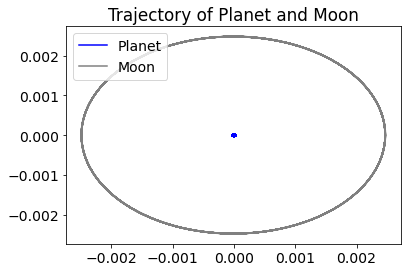

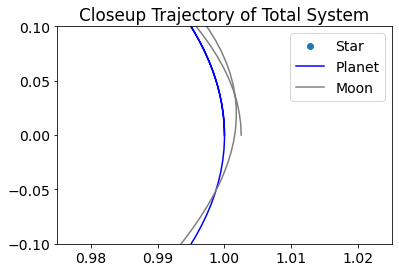

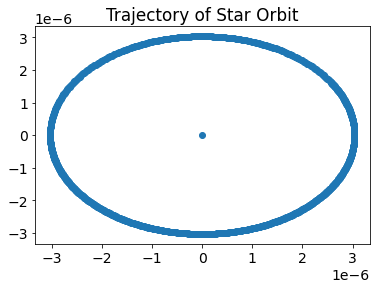

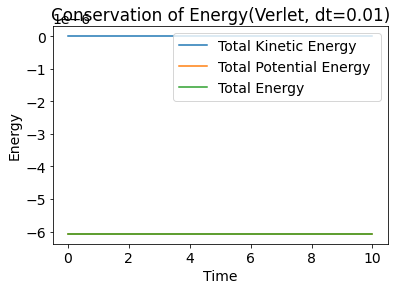

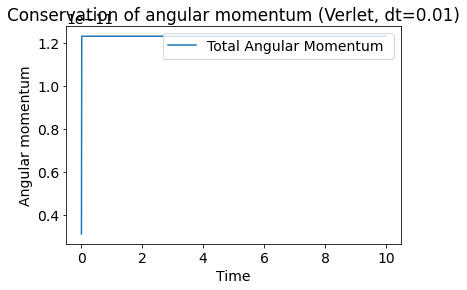

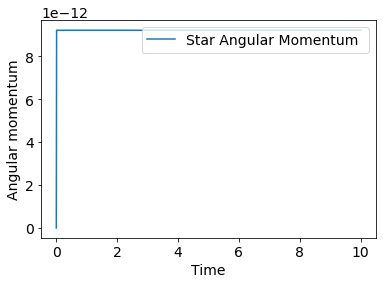

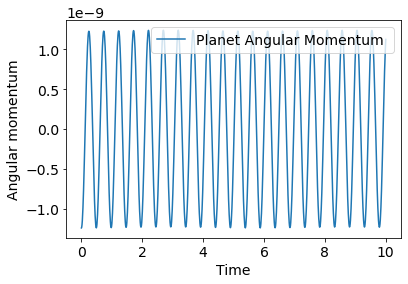

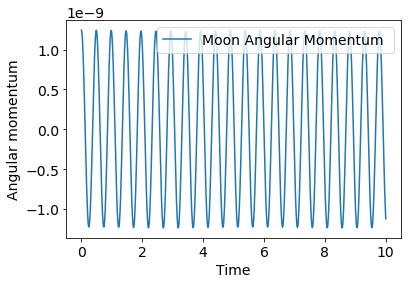

In [22]:
Ndim = 2
step_sum = 10
dt = 0.01
Nsteps = int(step_sum/dt)
G = 1 

m1 = 1.0      #Star  
m2 = 3e-6     #Planet
m3 = 3.6e-8   #Moon
m23 = m2 + m3

t = np.linspace(0,Nsteps*dt,Nsteps)

r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
r3 = np.zeros((Nsteps,Ndim))

r_com23 = np.zeros((Nsteps,Ndim))
r_com123 = np.zeros((Nsteps,Ndim))
v_com23 = np.zeros((Nsteps,Ndim))

v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))
v3 = np.zeros((Nsteps,Ndim))

pe_p3 = np.zeros((Nsteps,3))
ke_p3 = np.zeros((Nsteps, 3))


r1[0]= np.array((0.0,0.0))
r2[0]= np.array((1.0,0.0))
r3[0] = np.array((1.0025,0.0))

r_com23[0] = np.array((center_of_mass(r2[0],r3[0],m2,m3)))
r_com123[0] = np.array((center_of_mass(r1[0],r_com23[0],m1,m23)))


v1[0] = np.array((0.0,-initial_velocity(r1[0],r_com23[0],m1,m23)))  
v2[0]= np.array((0.0,-initial_velocity(r2[0],r3[0],m2,m3))) 
v3[0] = np.array((0.0,initial_velocity(r3[0],r2[0],m3,m2))) 
v_com23[0] = np.array((0.0,initial_velocity(r_com23[0],r1[0],m23,m1)))


step = 0
ke_p3[step,0] = 0.5*m1*np.dot(v1[step],v1[step])
pe_p3[step,0] = -G*m1*m2/(np.sqrt(np.dot(r1[step] - r2[step],r1[step]-r2[step]))) -G*m1*m3/(np.sqrt(np.dot(r1[step] - r3[step],r1[step]-r3[step])))

ke_p3[step,1] = 0.5*m2*np.dot(v2[step],v2[step]) 
pe_p3[step,1] = -G*m1*m2/(np.sqrt(np.dot(r2[step] - r1[step],r2[step]-r1[step])))-G*m3*m2/(np.sqrt(np.dot(r2[step] - r3[step],r2[step]-r3[step])))

ke_p3[step,2] = 0.5*m3*np.dot(v3[step],v3[step]) 
pe_p3[step,2] = -G*m3*m1/(np.sqrt(np.dot(r3[step] - r1[step],r3[step]-r1[step])))-G*m3*m2/(np.sqrt(np.dot(r3[step] - r2[step],r3[step]-r2[step])))


# plt.figure()
# plt.plot(r1[0,0],r1[0,1],'yo')
# plt.plot(r_com123[0,0],r_com123[0,1],'x')
# plt.plot(r_com23[0,0],r_com23[0,1],'x')
# plt.show()

r2 -= r_com23
r3 -= r_com23

for i in range(Nsteps-1):
    
    #force at current step
    f2 = force(r2[i],r3[i],m2,m3)
    f3 = force(r3[i],r2[i],m3,m2)

    r2[i+1] = r2[i] + dt* v2[i] + dt*dt*0.5*f2/m2
    r3[i+1] = r3[i] + dt* v3[i] + dt*dt*0.5*f3/m3
    
    #force at next step
    f2_dt = force(r2[i+1],r3[i+1],m2,m3)
    f3_dt = force(r3[i+1],r2[i+1],m3,m2)
    
    v2[i+1] = v2[i] + dt * 0.5 * (f2 + f2_dt)/m2
    v3[i+1] = v3[i] + dt * 0.5 * (f3 + f3_dt)/m3
    
    
    
    
plt.figure()
plt.plot(r2[:,0],r2[:,1],label='Planet',color='blue')
plt.plot(r3[:,0],r3[:,1],label='Moon',color='grey')
plt.legend(loc='upper left')
plt.title('Trajectory of Planet and Moon')
plt.show()

r1-= r_com123
r_com23 -= r_com123

for i in range(Nsteps-1):
    
    #force at current step
    f1 = force(r1[i],r_com23[i],m1,m23)
    f23 = force(r_com23[i],r1[i],m23,m1)

    r1[i+1] = r1[i] + dt* v1[i] + dt*dt*0.5*f1/m1
    r_com23[i+1] = r_com23[i] + dt* v_com23[i] + dt*dt*0.5*f23/m23
    
    #force at next step
    
    f23_dt = force(r_com23[i+1],r1[i+1],m23,m1)
    f1_dt = force(r1[i+1],r_com23[i+1],m1,m23)
    
    v1[i+1] = v1[i] + dt * 0.5 * (f1 + f1_dt)/m1
    v_com23[i+1] = v_com23[i] + dt * 0.5 * (f23 + f23_dt)/m23
    
    
r1 += r_com123
r_com23 += r_com123
    
r2 += r_com23
r3 += r_com23


for i in range(Nsteps-1):
    
    ke_p3[i+1,1] = 0.5*m2*np.dot(v2[i+1],v2[i+1]) 
    pe_p3[i+1,1] = -G*m1*m2/(np.sqrt(np.dot(r2[i+1] - r1[i+1],r2[i+1]-r1[i+1]))) - G*m3*m2/(np.sqrt(np.dot(r2[i+1] - r3[i+1],r2[i+1]-r3[i+1])))

    ke_p3[i+1,2] = 0.5*m3*np.dot(v3[i+1],v3[i+1]) 
    pe_p3[i+1,2] = -G*m3*m1/(np.sqrt(np.dot(r3[i+1] - r1[i+1],r3[i+1]-r1[i+1]))) - G*m3*m2/(np.sqrt(np.dot(r3[i+1] - r2[i+1],r3[i+1]-r2[i+1])))
    
    ke_p3[i+1,0] = 0.5*m1*np.dot(v1[i+1],v1[i+1])
    pe_p3[i+1,0] = -G*m1*m2/(np.sqrt(np.dot(r1[i+1] - r2[i+1],r1[i+1]-r2[i+1]))) - G*m1*m3/(np.sqrt(np.dot(r1[i+1] - r3[i+1],r1[i+1]-r3[i+1])))

    
    
# Calculate the z-component of the angular momentum for each planet
L1p3 = m1*(r1[:,0]*v1[:,1] - r1[:,1]*v1[:,0])
L2p3 = m2*(r2[:,0]*v2[:,1] - r2[:,1]*v2[:,0])
L3p3 = m3*(r3[:,0]*v3[:,1] - r3[:,1]*v3[:,0])

# Calculate the total angular momentum
L_tot = L1p3 + L2p3 + L3p3

# Total Kinetic Energy 

ke_tot = ke_p3[:,0] + ke_p3[:,1] + ke_p3[:,2]
# Total Potential Energy 
pe_tot = pe_p3[:,0] + pe_p3[:,1] + pe_p3[:,2]

plt.figure()
plt.scatter(r1[:,0],r1[:,1],label='Star')
plt.plot(r2[:,0],r2[:,1],label='Planet',color='blue')
plt.plot(r3[:,0],r3[:,1],label='Moon',color='grey')
plt.xlim(0.975, 1.025)  
plt.ylim(-0.1, 0.1)
plt.legend()
plt.title('Closeup Trajectory of Total System')
plt.show()

plt.figure()
plt.scatter(r1[:,0],r1[:,1])
plt.title('Trajectory of Star Orbit')
plt.show()

plt.figure()
plt.plot(t,ke_tot, label='Total Kinetic Energy ')
plt.plot(t,pe_tot, label='Total Potential Energy ')
plt.plot(t,pe_tot+ke_tot, label='Total Energy ')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend(loc='upper right')
plt.title(f'Conservation of Energy(Verlet, dt={dt})')
plt.show()

plt.figure()
plt.plot(t,L_tot, label='Total Angular Momentum ')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.title(f'Conservation of angular momentum (Verlet, dt={dt})')
plt.show()

plt.figure()
plt.plot(t,L1p3 , label='Star Angular Momentum ')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.show()

plt.figure()
plt.plot(t,L2p3 , label='Planet Angular Momentum ')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.show()

plt.figure()
plt.plot(t,L3p3 , label='Moon Angular Momentum ')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.show()


### Analysis 
In the graphs above, we can see that the orbit it carried out and that the Star is also orbiting the center of mass of the whole system at very small distance. I have not considered that size of the star, but it highly likely that the center of mass123 will be inside the Star radius.

## 3.5 Different Integerator 

### Two Planet System (Planet & Sun) Not including center of masses.



#### About the RK4 Function 
The function RK4 implements the 4th order Runge-Kutta method for solving the motion of a mass m1 due to the force from another mass m2. The inputs to the function are the initial position r1 and velocity v1 of m1, the positions of m2, the masses of m1 and m2, and the time step dt. The function returns the updated position and velocity of m1 after one time step. The implementation calculates the k-values (k1, k2, k3, k4) for both position and velocity of m1 using the force function.Finally, updated position and velocity of m1 is calculated using these k-values.

In [23]:
def force(r1,r2,m1,m2):
   
    r12 = r2 - r1
    mag = np.sqrt(np.dot(r12,r12))
    f_on_m1 = (G * m1 * m2 / (mag **3)) * r12
    return f_on_m1

def RK4(r1,r2,v1,m1,m2,dt):
    """ Runge-Kutta 4th order method for solving motion of a mass m1 
    due to force from mass m2.
    
    Args:
        r1 (float): position of m1
        r2 (float): position of m2
        v1 (float): velocity of m1
        m1 (float): mass of m1
        m2 (float): mass of m2
        dt (float): time step
           
    Returns:
        r1 (float): position of m1
        v1 (float): velocity of m1
    """
    k1r = v1
    k1v = force(r1,r2,m1,m2)/m1

    k2r = v1 + 0.5*dt*k1v
    k2v = force(r1+0.5*dt*k1r,r2,m1,m2)/m1

    k3r = v1 + 0.5*dt*k2v
    k3v = force(r1+0.5*dt*k2r,r2,m1,m2)/m1

    k4r = v1 + dt*k3v
    k4v = force(r1+dt*k3r,r2,m1,m2)/m1

    r1new = r1 + dt/6.0 * (k1r + 2.0*k2r + 2.0*k3r + k4r)
    v1new = v1 + dt/6.0 * (k1v + 2.0*k2v + 2.0*k3v + k4v)

    return r1new, v1new

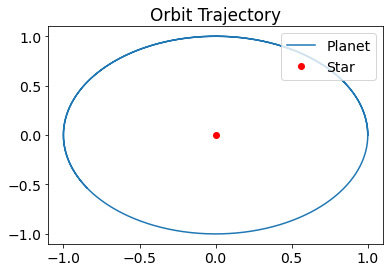

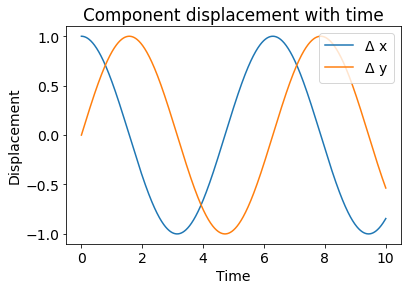

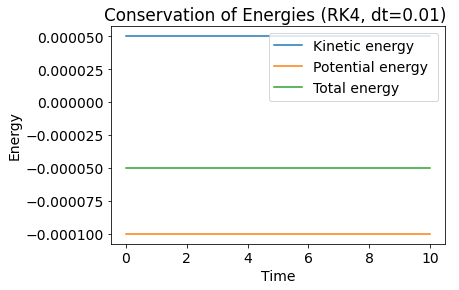

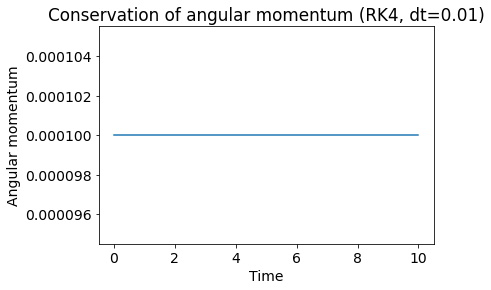

In [24]:
Ndim = 2 
step_sum = 10
dt = 0.01
Nsteps = int(step_sum/dt)
G = 1   


m1 = 1.0        # large mass
m2 = 0.0001     # small mass

r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))

KE_E = np.zeros((Nsteps,1))
PE_E = np.zeros((Nsteps,1))


# Initial conditions:
r2[0] = np.array([1.0, 0.0]) 
v2[0] = np.array([0.0, 1.0])

step = 0
KE_E[step] = 0.5*m1*np.dot(v1[step],v1[step]) + 0.5*m2*np.dot(v2[step],v2[step])
PE_E[step] = -G*m1*m2/(np.sqrt(np.dot(r1[step] - r2[step],r1[step]-r2[step])))


for i in range(Nsteps-1):

    #r2[i+1] , v2[i+1] = RK4_method_2_p(r2[i],r1[i],v2[i],m2,dt)
    r2[i+1] , v2[i+1] = RK4(r2[i],r1[i],v2[i],m2,m1,dt)
    
    KE_E[i+1] = 0.5 * m2 * np.dot(v2[i+1],v2[i+1])
    PE_E[i+1] = -G * m1 * m2 / np.sqrt(np.dot(r1[i+1]-r2[i+1],r1[i+1]-r2[i+1]))
    
# L1z_RK = m2*(r2[:,0]*v2[:,1] - r2[:,1]*v2[:,0])
L1z_RK = m2 * np.cross(r2,v2)

#Array for timestep 
t = np.linspace(0,Nsteps*dt,Nsteps)
plt.figure()
plt.plot(r2[:,0],r2[:,1],label='Planet')
plt.plot(0,0,'ro',label='Star')
plt.legend(loc='upper right')
plt.title('Orbit Trajectory')
plt.show()

plt.figure()
plt.plot(t,r2[:,0],label='$\Delta$ x ')
plt.plot(t,r2[:,1],label='$\Delta$ y')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Component displacement with time')
plt.show()

plt.figure()
plt.plot(t,KE_E[:,0], label='Kinetic energy ')
plt.plot(t,PE_E[:,0], label='Potential energy ')
plt.plot(t,KE_E[:,0]+PE_E[:,0],label='Total energy ')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend(loc='upper right')
plt.title(f'Conservation of Energies (RK4, dt={dt}) ')
plt.show()

plt.figure()
plt.plot(t,np.round(L1z_RK,5))
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.title(f'Conservation of angular momentum (RK4, dt={dt})')
plt.show()


### Analysis
Comparing this to eauler, the trajectory of the planet is in orbit and it is not spinning out of the system. The displacemt of the components is periodic. In addition, this mean that the enrgies are conserved, and when we will be plotting the total energy of the system it will be just a stright horizontal line (same result when using Verlet method)

## Two planet system similar mass

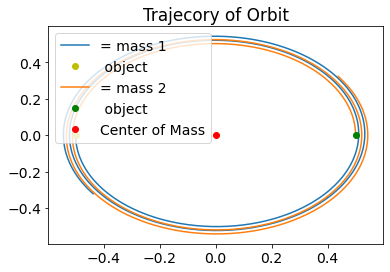

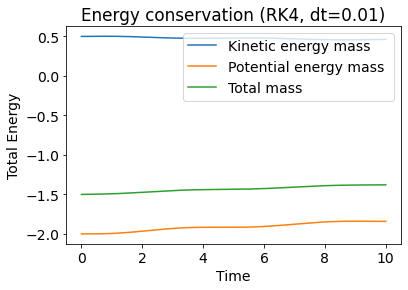

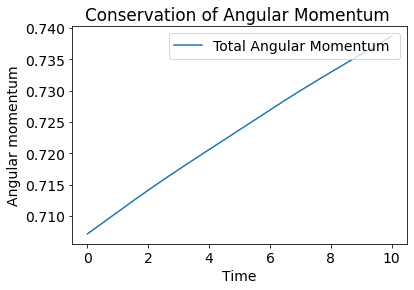

In [25]:
Ndim = 2
step_sum = 10
dt = 0.01
Nsteps = int(step_sum/dt)
G = 1   
t = np.linspace(0,Nsteps*dt,Nsteps)

m1 = 1.0     # large mass
m2 = 1.0     # small mass

r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))

KE_E = np.zeros((Nsteps,2))
PE_E = np.zeros((Nsteps,2))


# Initial conditions:
r1[0] = np.array(( -0.5 , 0.0 ))
v1[0] = np.array(( 0.0, -np.sqrt(0.5)))

r2[0] = np.array([0.5, 0.0]) 
v2[0] = np.array([0.0, np.sqrt(0.5)])

step = 0
KE_E[step,0] = 0.5*m1*np.dot(v1[step],v1[step])
PE_E[step,0] = -G*m1*m2/(np.sqrt(np.dot(r1[step] - r2[step],r1[step]-r2[step])))

KE_E[step,1] = 0.5*m2*np.dot(v2[step],v2[step]) 
PE_E[step,1] = -G*m1*m2/(np.sqrt(np.dot(r2[step] - r1[step],r2[step]-r1[step])))


for i in range(Nsteps-1):

    r1[i+1] , v1[i+1] = RK4(r1[i],r2[i],v1[i],m1,m2,dt)
    r2[i+1] , v2[i+1] = RK4(r2[i],r1[i],v2[i],m2,m1,dt)
    
    KE_E[i+1,0] = 0.5 * m2 * np.dot(v1[i+1],v1[i+1])
    PE_E[i+1,0] = -G * m1 * m2 / np.sqrt(np.dot(r1[i+1]-r2[i+1],r1[i+1]-r2[i+1]))
    
    KE_E[i+1,1] = 0.5 * m2 * np.dot(v2[i+1],v2[i+1])
    PE_E[i+1,1] = -G * m1 * m2 / np.sqrt(np.dot(r2[i+1]-r1[i+1],r2[i+1]-r1[i+1]))
    
L1z_RK2 = m2*(r2[:,0]*v2[:,1] - r2[:,1]*v2[:,0])
L1z_RK1 = m1*(r1[:,0]*v1[:,1] - r1[:,1]*v1[:,0])

L1z_RK_tot = L1z_RK2 + L1z_RK1

# Total Kinetic Energy 
ke_tot_z= KE_E[:,0] + KE_E[:,1] 
# Total Potential Energy 
pe_tot_z = PE_E[:,0] + PE_E[:,1]

plt.figure()
plt.plot(r1[:,0],r1[:,1], label = '= mass 1')
plt.plot(r1[0,0],r1[0,1],'yo', label=' object')
plt.plot(r2[:,0],r2[:,1], label = '= mass 2')
plt.plot(r2[0,0],r2[0,1],'go', label=' object')
plt.plot(0, 0, 'ro', label='Center of Mass')
plt.title("Trajecory of Orbit")
plt.legend(loc='upper left')
plt.show()


#Plot the sum of Kinetic and Potential Energies 
plt.figure()
# plt.plot(t,KE_E_v1[:,0], label='Kinetic energy mass 1')
plt.plot(t,ke_tot_z, label='Kinetic energy mass ')
# plt.plot(t,PE_E_v1[:,0], label='Potential energy mass 1')
plt.plot(t,pe_tot_z, label='Potential energy mass ')
# plt.plot(t,KE_E_v1[:,0]+PE_E_v1[:,0], label='Total Energy mass 1')
plt.plot(t,ke_tot_z+pe_tot_z, label='Total mass ')
plt.title(f'Energy conservation (RK4, dt={dt})')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.legend(loc='upper right')
plt.show()

plt.figure()
plt.plot(t,L1z_RK_tot, label='Total Angular Momentum ')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.title('Conservation of Angular Momentum ')
plt.show()

### System (Moon & Planet & Sun) Not Including center of masses.

In here i am just repeating the same stuff done in previous sections but with different integrator which is more precise then others.

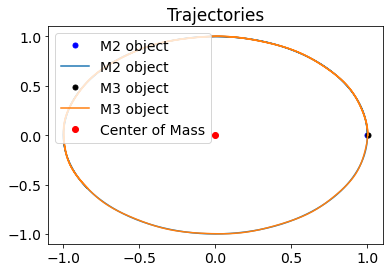

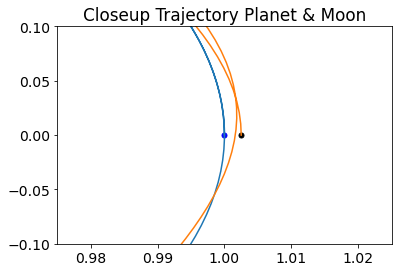

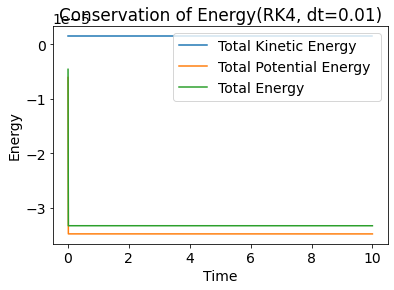

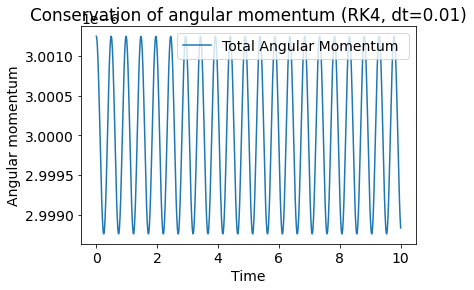

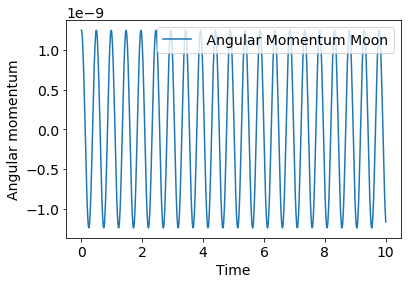

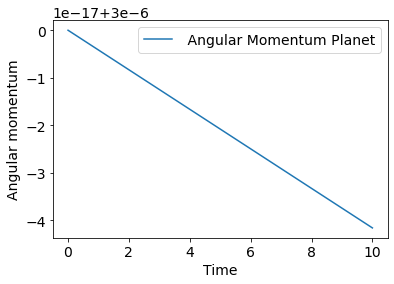

In [26]:
Ndim = 2
step_sum = 10
dt = 0.01
Nsteps = int(step_sum/dt)
G = 1   

t = np.linspace(0,Nsteps*dt,Nsteps)

m1 = 1.0      #Star  
m2 = 3e-6     #Planet
m3 = 3.6e-8   #Moon

#Storate of position velocity acceleration and energys
r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
r3 = np.zeros((Nsteps,Ndim))

v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))
v3 = np.zeros((Nsteps,Ndim))

acc1 = np.zeros((Nsteps,Ndim))
acc2 = np.zeros((Nsteps,Ndim))
acc3 = np.zeros((Nsteps,Ndim))

pe = np.zeros((Nsteps,3))
ke = np.zeros((Nsteps, 3))

#Initial conditions
r1_0 = np.array((0.0,0.0))
r2_0 = np.array((1.0,0.0))
r3_0 = np.array((1.0025,0.0))

v1_0 = np.array((0.0,0.0)) #Large object at center 
v2_0 = np.array((0.0,1.0)) # Using the formula above 
v3_0 = np.array((0.0,(np.sqrt(3))/50)) 


# Putting initial conditions into storage 
r1[0] = r1_0 
r2[0] = r2_0
r3[0] = r3_0

v1[0] = v1_0
v2[0] = v2_0 
v3[0] = v3_0

step = 0
ke[step,0] = 0.5*m1*np.dot(v1[step],v1[step])
pe[step,0] = -G*m1*m2/(np.sqrt(np.dot(r1[step] - r2[step],r1[step]-r2[step]))) -G*m1*m3/(np.sqrt(np.dot(r1[step] - r3[step],r1[step]-r3[step])))

ke[step,1] = 0.5*m2*np.dot(v2[step],v2[step]) 
pe[step,1] = -G*m1*m2/(np.sqrt(np.dot(r2[step] - r1[step],r2[step]-r1[step])))-G*m3*m2/(np.sqrt(np.dot(r2[step] - r3[step],r2[step]-r3[step])))

ke[step,2] = 0.5*m3*np.dot(v3[step],v3[step]) 
pe[step,2] = -G*m3*m1/(np.sqrt(np.dot(r3[step] - r1[step],r3[step]-r1[step])))-G*m3*m2/(np.sqrt(np.dot(r3[step] - r2[step],r3[step]-r2[step])))


r3-=r2

for i in range(Nsteps-1):
    r2[i+1] , v2[i+1] = RK4(r2[i],r1[i],v2[i],m2,m1,dt)
    r3[i+1] , v3[i+1] = RK4(r3[i],r2[i]-r2[i],v3[i],m3,m2,dt)
    
    ke[i+1,0] = 0.5*m1*np.dot(v1[i+1],v1[i+1])
    pe[i+1,0] = -G*m1*m2/(np.sqrt(np.dot(r1[i+1] - r2[i+1],r1[i+1]-r2[i+1]))) - G*m1*m3/(np.sqrt(np.dot(r1[i+1] - r3[i+1],r1[i+1]-r3[i+1])))

    ke[i+1,1] = 0.5*m2*np.dot(v2[i+1],v2[i+1]) 
    pe[i+1,1] = -G*m1*m2/(np.sqrt(np.dot(r2[i+1] - r1[i+1],r2[i+1]-r1[i+1]))) - G*m3*m2/(np.sqrt(np.dot(r2[i+1] - r3[i+1],r2[i+1]-r3[i+1])))

    ke[i+1,2] = 0.5*m3*np.dot(v3[i+1],v3[i+1]) 
    pe[i+1,2] = -G*m3*m1/(np.sqrt(np.dot(r3[i+1] - r1[i+1],r3[i+1]-r1[i+1]))) - G*m3*m2/(np.sqrt(np.dot(r3[i+1] - r2[i+1],r3[i+1]-r2[i+1])))

    
r3+=r2

# Calculate the z-component of the angular momentum for each planet
L2RK = m2*(r2[:,0]*v2[:,1] - r2[:,1]*v2[:,0])
L1RK = 0.0 # m1*(r1[:,0]*v1[:,1] - r1[:,1]*v1[:,0])
L3RK = m3*(r3[:,0]*v3[:,1] - r3[:,1]*v3[:,0])

# Calculate the total angular momentum
Lz_totalRK = L1RK + L2RK + L3RK

# Total Kinetic Energy 
ke_totRK = ke[:,0] + ke[:,1] + ke[:,2]
# Total Potential Energy 
pe_totRK = pe[:,0] + pe[:,1] + pe[:,2]


plt.figure()
plt.plot(r2[0,0],r2[0,1],'bo', markersize=5,label='M2 object')
plt.plot(r2[:,0], r2[:,1],label='M2 object')
plt.plot(r3[0,0],r3[0,1],'ko',markersize=5, label='M3 object')
plt.plot(r3[:,0], r3[:,1], label='M3 object')
plt.plot(0, 0, 'ro', label='Center of Mass')
plt.legend(loc='upper left')
plt.title('Trajectories')
plt.show()

plt.figure()
plt.plot(r2[0,0],r2[0,1],'bo', markersize=5,label='M2 object')
plt.plot(r2[:,0], r2[:,1],label='M2 object')
plt.plot(r3[0,0],r3[0,1],'ko',markersize=5, label='M3 object')
plt.plot(r3[:,0], r3[:,1], label='M3 object')
plt.plot(0, 0, 'ro', label='Center of Mass')
plt.xlim(0.975, 1.025)  
plt.ylim(-0.1, 0.1)
plt.title('Closeup Trajectory Planet & Moon')
plt.show()

plt.figure()
plt.plot(t,ke_totRK, label='Total Kinetic Energy ')
plt.plot(t,pe_totRK, label='Total Potential Energy ')
plt.plot(t,pe_totRK+ke_totRK, label='Total Energy ')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend(loc='upper right')
plt.title(f'Conservation of Energy(RK4, dt={dt})')
plt.show()

plt.figure()
plt.plot(t,Lz_totalRK, label='Total Angular Momentum ')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.title(f'Conservation of angular momentum (RK4, dt={dt})')
plt.show()

plt.figure()
plt.plot(t,L3RK, label=' Angular Momentum Moon')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.show()

plt.figure()
plt.plot(t,L2RK, label=' Angular Momentum Planet')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.show()

### System (Moon & Planet & Sun)  Including center of masse of whole system

In [27]:
def initial_velocity(r1,r2,m1,m2):
#      """
#     Calculates the initial velocity required for an object of mass m1 to escape the gravitational pull of 
#     another object of mass m2, given their initial positions r1 and r2.

#     Parameters:
    
#     r1 : Initial position vector of object 1, in meters
#     r2 : Initial position vector of object 2, in meters
#     m1 : Mass of object 1, in kilograms
#     m2 : Mass of object 2, in kilograms

#     Returns:
#     v1 :Initial velocity of object 1 required to escape the gravitational pull of object 2, in meters per second
    
#     """
    r12 = r2-r1
    mag =  np.sqrt(np.dot(r12,r12))
    v1 = np.sqrt(G*m2*m2/((mag)*(m1+m2)))
    return v1 


def center_of_mass(r1,r2,m1,m2):
#     """
#     Calculates the center of mass of a two-body system, given the initial positions and masses of the objects.

#     Parameters:
#     ----------
#     r1 : Initial position vector of object 1, in meters
#     r2 : Initial position vector of object 2, in meters
#     m1 : Mass of object 1, in kilograms
#     m2 : Mass of object 2, in kilograms

#     Returns:
  
#     r_cm : Position vector of the center of mass of the two-body system, in meters
#     """
    
    return (m1*r1+m2*r2)/(m1+m2)

Ndim = 2
step_sum = 100
dt = 0.01
Nsteps = int(step_sum/dt)
G = 1   

t = np.linspace(0,Nsteps*dt,Nsteps)

m1 = 1.0      #Star  
m2 = 3e-6     #Planet
m3 = 3.6e-8   #Moon
r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
r3 = np.zeros((Nsteps,Ndim))

r_com23 = np.zeros((Nsteps,Ndim))
r_com123 = np.zeros((Nsteps,Ndim))
v_com23 = np.zeros((Nsteps,Ndim))

v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))
v3 = np.zeros((Nsteps,Ndim))

pe_p3 = np.zeros((Nsteps,3))
ke_p3 = np.zeros((Nsteps, 3))


step = 0
ke[step,0] = 0.5*m1*np.dot(v1[step],v1[step])
pe[step,0] = -G*m1*m2/(np.sqrt(np.dot(r1[step] - r2[step],r1[step]-r2[step]))) -G*m1*m3/(np.sqrt(np.dot(r1[step] - r3[step],r1[step]-r3[step])))

ke[step,1] = 0.5*m2*np.dot(v2[step],v2[step]) 
pe[step,1] = -G*m1*m2/(np.sqrt(np.dot(r2[step] - r1[step],r2[step]-r1[step])))-G*m3*m2/(np.sqrt(np.dot(r2[step] - r3[step],r2[step]-r3[step])))

ke[step,2] = 0.5*m3*np.dot(v3[step],v3[step]) 
pe[step,2] = -G*m3*m1/(np.sqrt(np.dot(r3[step] - r1[step],r3[step]-r1[step])))-G*m3*m2/(np.sqrt(np.dot(r3[step] - r2[step],r3[step]-r2[step])))



r1[0]= np.array((0.0,0.0))
r2[0]= np.array((1.0,0.0))
r3[0] = np.array((1.0025,0.0))

r_com23[0] = np.array((center_of_mass(r2[0],r3[0],m2,m3)))
r_com123[0] = np.array((center_of_mass(r1[0],r_com23[0],m1,m23)))
# print(r_com123)

v1[0] = np.array((0.0,-initial_velocity(r1[0],r_com23[0],m1,m23)))  
v2[0]= np.array((0.0,-initial_velocity(r2[0],r3[0],m2,m3))) 
v3[0] = np.array((0.0,initial_velocity(r3[0],r2[0],m3,m2))) 
v_com23[0] = np.array((0.0,initial_velocity(r_com23[0],r1[0],m23,m1)))

r2 -= r_com23
r3 -= r_com23

for i in range(Nsteps-1):
    
    r2[i+1] , v2[i+1] = RK4(r2[i],r3[i],v2[i],m2,m3,dt)
    r3[i+1] , v3[i+1] = RK4(r3[i],r2[i],v3[i],m3,m2,dt)
    

r1 -= r_com123
r_com23 -= r_com123

for i in range(Nsteps-1):
     
    r_com23[i+1] , v_com23[i+1] = RK4(r_com23[i],r1[i],v_com23[i],m23,m1,dt)
    r1[i+1] , v1[i+1] = RK4(r1[i],r_com23[i],v1[i],m1,m23,dt)

    
r2 += r_com23
r3 += r_com23

for i in range(Nsteps-1):
    
    ke_p3[i+1,1] = 0.5*m2*np.dot(v2[i+1],v2[i+1]) 
    pe_p3[i+1,1] = -G*m1*m2/(np.sqrt(np.dot(r2[i+1] - r1[i+1],r2[i+1]-r1[i+1]))) - G*m3*m2/(np.sqrt(np.dot(r2[i+1] - r3[i+1],r2[i+1]-r3[i+1])))

    ke_p3[i+1,2] = 0.5*m3*np.dot(v3[i+1],v3[i+1]) 
    pe_p3[i+1,2] = -G*m3*m1/(np.sqrt(np.dot(r3[i+1] - r1[i+1],r3[i+1]-r1[i+1]))) - G*m3*m2/(np.sqrt(np.dot(r3[i+1] - r2[i+1],r3[i+1]-r2[i+1])))
    
    ke_p3[i+1,0] = 0.5*m1*np.dot(v1[i+1],v1[i+1])
    pe_p3[i+1,0] = -G*m1*m2/(np.sqrt(np.dot(r1[i+1] - r2[i+1],r1[i+1]-r2[i+1]))) - G*m1*m3/(np.sqrt(np.dot(r1[i+1] - r3[i+1],r1[i+1]-r3[i+1])))

    
    
# Calculate the z-component of the angular momentum for each planet
L1p3RK = m1*(r1[:,0]*v1[:,1] - r1[:,1]*v1[:,0])
L2p3RK = m2*(r2[:,0]*v2[:,1] - r2[:,1]*v2[:,0])
L3p3RK = m3*(r3[:,0]*v3[:,1] - r3[:,1]*v3[:,0])

# Calculate the total angular momentum
L_total_RK = L1p3RK + L2p3RK + L3p3RK

# Total Kinetic Energy 

ke_totRK = ke_p3[:,0] + ke_p3[:,1] + ke_p3[:,2]
# Total Potential Energy 
pe_totRK = pe_p3[:,0] + pe_p3[:,1] + pe_p3[:,2]



t = np.linspace(0,Nsteps*dt,Nsteps)

/var/folders/0y/rxyxzgvj6w98rkkdqslkxlf80000gn/T/ipykernel_35659/4294196608.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  pe[step,0] = -G*m1*m2/(np.sqrt(np.dot(r1[step] - r2[step],r1[step]-r2[step]))) -G*m1*m3/(np.sqrt(np.dot(r1[step] - r3[step],r1[step]-r3[step])))
/var/folders/0y/rxyxzgvj6w98rkkdqslkxlf80000gn/T/ipykernel_35659/4294196608.py:73: RuntimeWarning: divide by zero encountered in double_scalars
  pe[step,1] = -G*m1*m2/(np.sqrt(np.dot(r2[step] - r1[step],r2[step]-r1[step])))-G*m3*m2/(np.sqrt(np.dot(r2[step] - r3[step],r2[step]-r3[step])))
/var/folders/0y/rxyxzgvj6w98rkkdqslkxlf80000gn/T/ipykernel_35659/4294196608.py:76: RuntimeWarning: divide by zero encountered in double_scalars
  pe[step,2] = -G*m3*m1/(np.sqrt(np.dot(r3[step] - r1[step],r3[step]-r1[step])))-G*m3*m2/(np.sqrt(np.dot(r3[step] - r2[step],r3[step]-r2[step])))


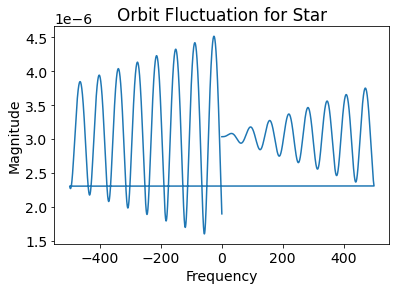

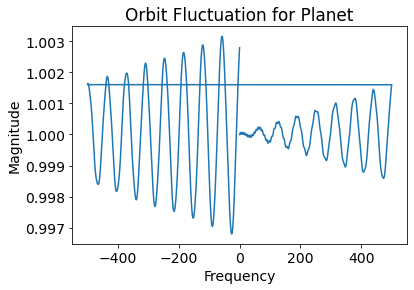

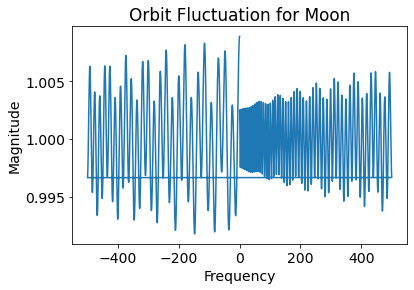

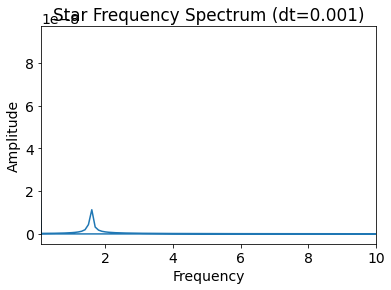

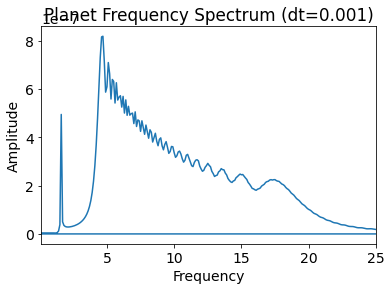

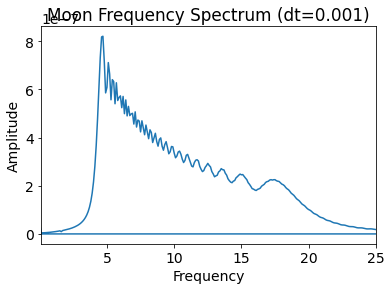

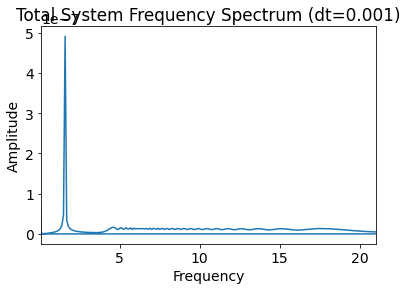

In [28]:
dt1 = 0.01
dt2 = 0.001

#Computing the Fourier transforms
freq1 = np.fft.fftfreq(len(L1p3RK), dt2)
ftL1p3RK = np.fft.fft(L1p3RK)

freq2 = np.fft.fftfreq(len(L2p3RK), dt2)
ftL2p3RK = np.fft.fft(L2p3RK)

freq3 = np.fft.fftfreq(len(L3p3RK), dt2)
ftL3p3RK = np.fft.fft(L3p3RK)

freqtot = np.fft.fftfreq(len(L_total_RK), dt2)
ftLtotp3RK = np.fft.fft(L_total_RK)


orbital_per1 = 1.0/(freq1+1e-20)
orbital_per2 = 1.0/(freq2+1e-20)
orbital_per3 = 1.0/(freq3+1e-20)

mag1_fft = np.sqrt(r1[:,0]**2 + r1[:,1]**2)
mag2_fft = np.sqrt(r2[:,0]**2 + r2[:,1]**2)
mag3_fft = np.sqrt(r3[:,0]**2 + r3[:,1]**2)


plt.figure()
plt.plot(freq1,mag1_fft)
plt.title('Orbit Fluctuation for Star')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

plt.figure()
plt.plot(freq2,mag2_fft)
plt.title('Orbit Fluctuation for Planet')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

plt.figure()
plt.plot(freq3,mag3_fft)
plt.title('Orbit Fluctuation for Moon')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

#Ploting the frequency-domain signals
plt.figure()
plt.plot(freq1, np.abs(ftL1p3RK))
plt.title('Star Frequency Spectrum (dt=0.001)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0.1, 10) 
plt.show()

plt.figure()
plt.plot(freq2, np.abs(ftL2p3RK))
plt.title('Planet Frequency Spectrum (dt=0.001)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0.1, 25) 
plt.show()

plt.figure()
plt.plot(freq3, np.abs(ftL3p3RK))
plt.title('Moon Frequency Spectrum (dt=0.001)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0.1, 25)  
# plt.ylim(0.1, 8.0)
plt.show()

plt.figure()
plt.plot(freqtot, np.abs(ftLtotp3RK))
plt.title('Total System Frequency Spectrum (dt=0.001)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0.1, 21)  
# plt.ylim(0.1, 8.0)
plt.show()

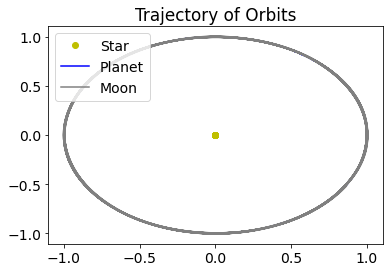

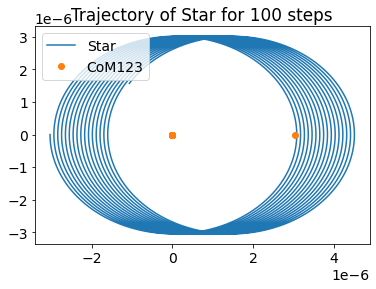

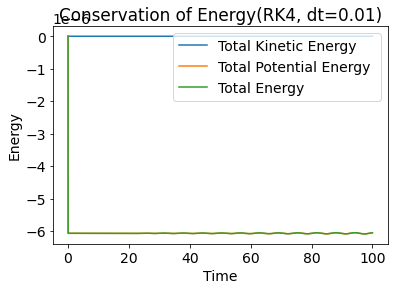

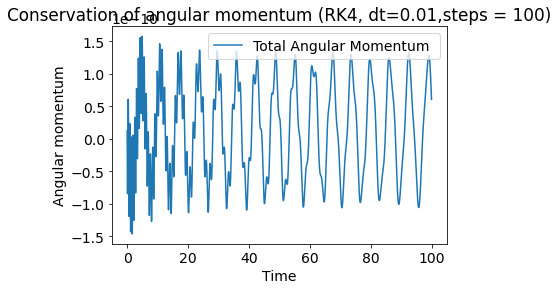

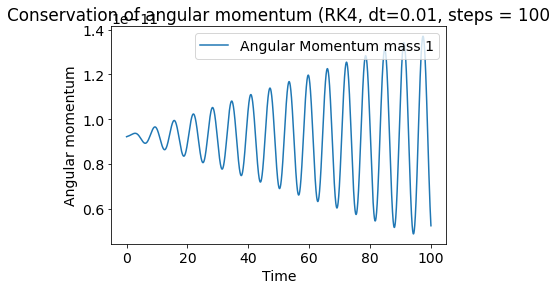

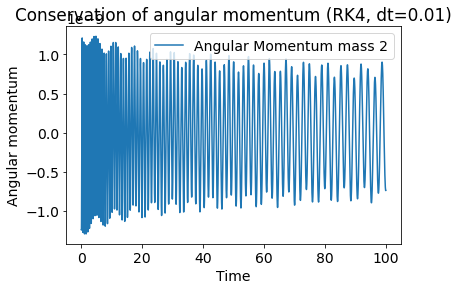

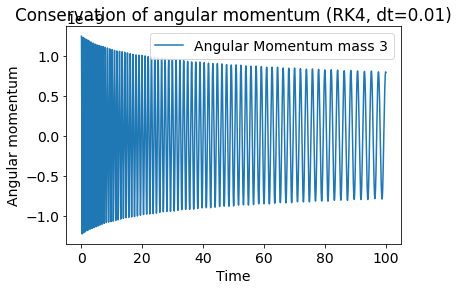

In [29]:
plt.figure
plt.plot(r1[:,0],r1[:,1],'yo',label='Star')
plt.plot(r2[:,0],r2[:,1],label='Planet',color='blue')
plt.plot(r3[:,0],r3[:,1],label='Moon',color='grey')
plt.title('Trajectory of Orbits')
# plt.xlim(0.975, 1.025)  
# plt.ylim(-0.1, 0.1)
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(r1[:,0],r1[:,1],label='Star')
plt.plot(r_com123[:,0],r_com123[:,1],'o',label='CoM123')
plt.legend(loc='upper left')
plt.title(f'Trajectory of Star for {step_sum} steps')
plt.show()

plt.figure()
plt.plot(t,ke_totRK, label='Total Kinetic Energy ')
plt.plot(t,pe_totRK, label='Total Potential Energy ')
plt.plot(t,pe_totRK+ke_totRK, label='Total Energy ')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend(loc='upper right')
plt.title(f'Conservation of Energy(RK4, dt={dt})')
plt.show()

plt.figure()
plt.plot(t,L_total_RK, label='Total Angular Momentum ')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.title(f'Conservation of angular momentum (RK4, dt={dt},steps = {step_sum})')
plt.show()

plt.figure()
plt.plot(t,L1p3RK, label='Angular Momentum mass 1')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.title(f'Conservation of angular momentum (RK4, dt={dt}, steps = {step_sum}')
plt.show()

plt.figure()
plt.plot(t,L2p3RK, label='Angular Momentum mass 2')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.title(f'Conservation of angular momentum (RK4, dt={dt})')
plt.show()

plt.figure()
plt.plot(t,L3p3RK, label='Angular Momentum mass 3')
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.legend(loc='upper right')
plt.title(f'Conservation of angular momentum (RK4, dt={dt})')
plt.show()

# Extension : Solar System Dynamics  
 From the extension part i have decided to choose the simulation of solar system using the RK4 method as it is way more accurate than the opther two methods mentioned before. I will be trying to use two methods, one is only using the forces between each planet and the other is similar to the COM of Planet and Moon. I will be evaluting the center of masses of each system (but as they are planets orbiting the sun i am not sure if it is genuilly correct to assume that) and then plotting the overall orbit of all planets.

## Method 1 Without Center of Mass

In [30]:
# r0 = Sun
# r1 = Mercury
# r2 = Venus
# r3 = Earth 
# r4 = Mars 

######################### Force Set 1##########################
def force_10(r):
   
    mag = np.sqrt(np.dot(r,r))
    f = (GG * Ms * Mmy / (mag **3)) * r
    return -f

def force_12(r1,r2):
   
    r12 = r2 - r1
    mag = np.sqrt(np.dot(r12,r12))
    f12 = (GG * Mmy * Mv / (mag **3)) * r12
    return f12

def force_13(r1,r3):
   
    r13 = r3 - r1
    mag = np.sqrt(np.dot(r13,r13))
    f13 = (GG * Mmy * Me / (mag **3)) * r13
    return f13

def force_14(r1,r4):
   
    r14 = r4 - r1
    mag = np.sqrt(np.dot(r14,r14))
    f14 = (GG * Mmy * Mms / (mag **3)) * r14
    return f14

######################### Force Set 2##########################
def force_20(r):
   
    mag = np.sqrt(np.dot(r,r))
    f = (GG * Ms * Mv / (mag **3)) * r
    return -f

def force_23(r2,r3):
   
    r23 = r3 - r2
    mag = np.sqrt(np.dot(r23,r23))
    f23 = (GG * Mv * Mmy / (mag **3)) * r23
    return f23

def force_24(r2,r4):
   
    r24 = r4 - r2
    mag = np.sqrt(np.dot(r24,r24))
    f24 = (GG * Mv * Mms / (mag **3)) * r24
    return f24


######################### Force Set 3##########################
def force_30(r):

    mag = np.sqrt(np.dot(r,r))
    f = (GG * Ms * Me / (mag **3)) * r
    return -f

def force_34(r3,r4):

    r34 = r4 - r3
    mag = np.sqrt(np.dot(r34,r34))
    f34 = (GG * Me * Mms / (mag **3)) * r34
    return f34

######################### Force Set 4##########################
def force_40(r):
   
    mag = np.sqrt(np.dot(r,r))
    f = (GG * Ms * Mms / (mag **3)) * r
    return -f

#####################################################
  
    
def force_solar(r,planet,rx,ry,rz,vx,vy,vz):
    
    """
    Calculates the net gravitational force on a planet due to the Sun and the other planets in the solar system.

    Parameters:
    
    r : fDistance from the planet to the Sun, in meters
    planet : Name of the planet ('Mercury', 'Venus', 'Earth', or 'Mars')
    rx : component of the next planet's position vector relative to the Sun
    ry : component of the next planet's position vector relative to the Sun
    rz : component of the next planet's position vector relative to the Sun
    vx : component of the next planet's velocity vector relative to the Sun
    vy : component of the next planet's velocity vector relative to the Sun
    vz : component of the next planet's velocity vector relative to the Sun

    Returns:
    F : et force on the planet due to the Sun and the other planets, in Newtons
    """
    
    if planet == 'Mercury':
        return force_10(r) + force_12(r,rx) + force_13(r,ry) + force_14(r,rz)
    if planet == 'Venus':
        return force_20(r) - force_12(r,rx) + force_23(r,ry) + force_24(r,rz)
    if planet == 'Earth':
        return force_30(r) - force_13(r,rx) - force_23(r,ry) + force_34(r,rz)
    if planet == 'Mars':
        return force_40(r) - force_14(r,rx) - force_24(r,ry) - force_34(r,rz)
    
def dr_dt(t,r,v,planet,rx,ry,rz,vx,vy,vz):
    """
    Returns the time derivative of the position vector r.

    Parameters:
    t : Current time, in seconds
    r : Position vector of the planet relative to the Sun, in meters
    v : Velocity vector of the planet, in meters per second
    planet :Name of the planet ('Mercury', 'Venus', 'Earth', or 'Mars')
    rx : component of the next planet's position vector relative to the Sun
    ry : component of the next planet's position vector relative to the Sun
    rz : component of the next planet's position vector relative to the Sun
    vx : component of the next planet's velocity vector relative to the Sun
    vy : component of the next planet's velocity vector relative to the Sun
    vz : component of the next planet's velocity vector relative to the Sun
    Returns:
    v : Velocity vector of the planet, in meters per second
    """
    return v


def dv_dt(t,r,v,planet,rx,ry,rz,vx,vy,vz):
    
    """
    Returns the time derivative of velocity vector v given position vector r and planet.

    Parameters:
    
    t : Time value (not used in the function).
    r : Position vector of the planet.
    v : Velocity vector of the planet.
    planet : Name of the planet.
    rx : component of the next planet's position vector relative to the Sun
    ry : component of the next planet's position vector relative to the Sun
    rz : component of the next planet's position vector relative to the Sun
    vx : component of the next planet's velocity vector relative to the Sun
    vy : component of the next planet's velocity vector relative to the Sun
    vz : component of the next planet's velocity vector relative to the Sun

    Returns:
    The time derivative of velocity vector v.

    """
    
    F = force_solar(r,planet,rx,ry,rz,vx,vy,vz)
    if planet == 'Mercury':
        y = F/Mmy
    if planet == 'Venus':
        y = F/Mv
    if planet == 'Earth':
        y = F/Me
    if planet == 'Mars':
        y = F/Mms
    return y 


#==================================================================================#
#Diffrential Equations Solver
#==================================================================================#

def RK4Solver(t,r,v,h,planet,rx,ry,rz,vx,vy,vz):
    
    """
    Uses the fourth-order Runge-Kutta method to solve a system of two first-order
    ordinary differential equations (ODEs) for the position and velocity of a planet
    in the solar system, given its initial state and the gravitational forces acting
    on it from the Sun and the other planets.
    
    """
    
    k11 = dr_dt(t,r,v,planet,rx,ry,rz,vx,vy,vz) 
    k21 = dv_dt(t,r,v,planet,rx,ry,rz,vx,vy,vz)
    
    k12 = dr_dt(t + 0.5*h,r + 0.5*h*k11,v + 0.5*h*k21,planet,rx,ry,rz,vx,vy,vz)
    k22 = dv_dt(t + 0.5*h,r + 0.5*h*k11,v + 0.5*h*k21,planet,rx,ry,rz,vx,vy,vz)
    
    k13 = dr_dt(t + 0.5*h,r + 0.5*h*k12,v + 0.5*h*k22,planet,rx,ry,rz,vx,vy,vz)
    k23 = dv_dt(t + 0.5*h,r + 0.5*h*k12,v + 0.5*h*k22,planet,rx,ry,rz,vx,vy,vz)
    
    k14 = dr_dt(t + h,r + h*k13,v + h*k23,planet,rx,ry,rz,vx,vy,vz)
    k24 = dv_dt(t + h,r + h*k13,v + h*k23,planet,rx,ry,rz,vx,vy,vz)
    
    y0 = r + h * (k11 + 2.*k12 + 2.*k13 + k14) / 6.
    y1 = v + h * (k21 + 2.*k22 + 2.*k23 + k24) / 6.
    
   
    return y0, y1

def KineticEnergy(v,m):
    
    """
    Calculates the kinetic energy of a particle with mass m and velocity v.

    Parameters:
    v : A numpy array representing the velocity vector of the particle.
    m : The mass of the particle.
    
    Returns:
    The kinetic energy of the particle.

    """
        
    vn = np.linalg.norm(v)
    return 0.5*m*vn**2

def PotentialEnergy(r,planet):
    
    """
    Calculates the gravitational potential energy of a planet due to the Sun at a given position.

        r: position vector of the planet with respect to the Sun, in units of AU.
        planet: the name of the planet ('Mercury', 'Venus', 'Earth', or 'Mars').

    Returns: 
    the gravitational potential energy of the planet at the given position, in units of J.
    """
    
    rmag = np.linalg.norm(r)
    
    if planet == 'Mercury':
        fmag = np.linalg.norm(force_10(r))
    if planet == 'Venus':
        fmag = np.linalg.norm(force_20(r))
    if planet == 'Earth':
        fmag = np.linalg.norm(force_30(r))
    if planet == 'Mars':
        fmag = np.linalg.norm(force_40(r))
        
    return -fmag*rmag

def AngMomentum(r,v,m):
    
    """
    Calculates the angular momentum of an object with respect to its orbital motion.

    Parameters:
    r : Position vector of the object in Cartesian coordinates
    v : Velocity vector of the object in Cartesian coordinates
    m : Mass of the object

    Returns:
    ang_momentum : The magnitude of the angular momentum of the object in kg m^2 / s
    """
    
    rn = np.linalg.norm(r)
    vn = np.linalg.norm(v)
    r = r/rn
    v = v/vn
    rdotv = r[0]*v[0]+r[1]*v[1]
    theta = math.acos(rdotv)
    return m*rn*vn*np.sin(theta)

def AreaCalc(r1,r2):
    
    """
    Calculates the area swept out by the line connecting two position vectors `r1` and `r2`,
    assuming that the line traces out a sector of a circle with radius equal to the average of
    the magnitudes of the two position vectors.

    Parameters:
    r1 : A 3-element numpy array representing the position vector at the initial time
    r2 :  A 3-element numpy array representing the position vector at the final time

    Returns:
    The area swept out by the line connecting `r1` and `r2` over the time interval"""
        
    r1n = np.linalg.norm(r1)
    r2n = np.linalg.norm(r2)
    
    r1 = r1 + 1e-20
    r2 = r2 + 1e-20
    
    theta1 = math.atan(abs(r1[1]/r1[0]))
    theta2 = math.atan(abs(r2[1]/r2[0]))
    
    rn = 0.5*(r1n+r2n)
    del_theta = np.abs(theta1 - theta2)
    
    return 0.5*del_theta*rn**2


def mplot(fign,x,y,xl,yl,clr,lbl):
    
    """
    Plots the given data on the specified figure.

    Parameters:
    fign The figure number.
    x The data to be plotted on the x-axis.
    y The data to be plotted on the y-axis.
    xl The label for the x-axis.
    yl The label for the y-axis.
    clr The color of the plotted line.
    lbl The label for the plotted line.

    Returns:
    The plotted line object.
    """
        
    plt.figure(fign)
    plt.xlabel(xl)    
    plt.ylabel(yl)
    return plt.plot(x,y,clr, linewidth =1.0,label = lbl)

In [31]:
# Data got from here https://ssd.jpl.nasa.gov/horizons/app.html#/

# Mercury : Normalised Orbit AU = 0.38709927 | Mass x10^23 (kg) = 3.302 | Mean Orbit vel.km/s = 47.362 
        
# Venus : Normalised Orbit AU = 0.72333566 | Mass x10^23 (kg) = 48.685 | Orbit speed, km/s = 35.021

# Earth : Normalised Orbit AU = 1.00000261 | Mass x10^24 (kg) = 5.97219 | Orbital speed, km/s = 29.79 

# Mars : Normalised Orbit AU =  1.52371034 | Mass x10^23 (kg) = 6.4171 | Orbital speed,  km/s  =  24.13
#==============================================================================================================#
#==============================================================================================================#

Ms = 1.989e30                 # Mass of Sun in kg 
Mmy = 3.302e23                # Mass of Mercury in kg
Mv = 48.685e23                # Mass of Venus in kg
Me = 5.97219e24               # Mass of Earth in kg
Mms = 6.4171e23               # Mass of Mars in Kg

G = 6.673e-11                 # Gravitational Constant

RR = 1.496e11                 # Normalizing distance in km (= 1 AU)
MM = 5.97219e24               # Normalizing mass
TT = 365*24*60*60          # Normalizing time (1 year)

FF = (G*MM**2)/RR**2          # Unit force
EE = FF*RR                    # Unit energy

GG =(MM*G*TT**2)/(RR**3)     # Normalised Gravitational Constant 

Ms = Ms/MM                    # Normalized mass of Sun
Mmy = Mmy/MM                  # Normalized mass of Mercury
Mv = Mv/MM                    # Normalized mass of Venus
Me = Me/MM                    # Normalized mass of Earth
Mms = Mms/MM                  # Normalized mass of Mars



ti = 0                        # initial time = 0
tf = 10                # final time = 120 years

N = 100*tf                    # 100 points per year
t = np.linspace(ti,tf,N)      # time array from ti to tf with N points 

h = t[2]-t[1]                 # time step (uniform)


############################### Storage ########################################

rmy = np.zeros([N,2])         # position vector of Mercury
vmy = np.zeros([N,2])         # velocity vector of Mercury

rv = np.zeros([N,2])          # position vector of Venus
vv = np.zeros([N,2])          # velocity vector of Venus

re = np.zeros([N,2])          # position vector of Earth
ve = np.zeros([N,2])          # velocity vector of Earth

rms = np.zeros([N,2])         # position vector of Mars
vms = np.zeros([N,2])         # velocity vector of Mars

KE = np.zeros([N,4])            # Kinetic energy for all palnets 
PE = np.zeros([N,4])            # Potential energy for all palnets 
AM = np.zeros([N,4])            # Angular momentum for all planets 
AreaVal = np.zeros([N,4])

################################################################################


############################### Initial Information ############################

rmyi = [-0.38709927,0.0]        # initial position of Mercury
rvi = [0.72333566,0.0]         # initial position of Venus
rei = [-1.00000261,0.0]         # initial position of Earth
rmsi = [1.52371034,0.0]        # initial position of Mars

vmyi = [0.0,47.362e3*TT/RR]            # Initial velocity vector for Mercury
vvi = [0.0,35.021e3*TT/RR]             # Initial velocity vector for Venus
vei = [0.0,29.79e3*TT/RR ]            # Initial velocity vector for Earth 
vmsi = [0.0,24.13e3*TT/RR]             # Initial velocity vector for Mars


############## Initializing the Array with initial Values  #####################

t[0] = ti

rmy[0,:] = rmyi
vmy[0,:] = vmyi

rv[0,:] = rvi
vv[0,:] = vvi

re[0,:] = rei
ve[0,:] = vei

rms[0,:] = rmsi
vms[0,:] = vmsi

# For Mercury
KE[0,0] = KineticEnergy(vmy[0,:],Mmy)
PE[0,0] = PotentialEnergy(rmy[0,:],'Mercury')
AM[0,0] = AngMomentum(rmy[0,:],vmy[0,:],Mmy)
AreaVal[0,0] = 0

# For Venus
KE[0,1] = KineticEnergy(vv[0,:],Mv)
PE[0,1] = PotentialEnergy(rv[0,:],'Venus')
AM[0,1] = AngMomentum(rv[0,:],vv[0,:],Mv)
AreaVal[0,1] = 0

# For Earth
KE[0,2] = KineticEnergy(ve[0,:],Me)
PE[0,2] = PotentialEnergy(re[0,:],'Earth')
AM[0,2] = AngMomentum(re[0,:],ve[0,:],Me)
AreaVal[0,2] = 0

# For Mars
KE[0,3] = KineticEnergy(vms[0,:],Mms)
PE[0,3] = PotentialEnergy(rms[0,:],"Mars")
AM[0,3] = AngMomentum(rms[0,:],vms[0,:],Mms)
AreaVal[0,3] = 0

################################################################################

for i in range(0,N-1):
    
    [rmy[i+1,:],vmy[i+1,:]]=RK4Solver(t[i],rmy[i,:],vmy[i,:],h,'Mercury',rv[i,:],re[i,:],rms[i,:],vv[i,:],ve[i,:],vms[i,:] )
    
    KE[i+1,0] = KineticEnergy(vmy[i+1,:],Mmy)
    PE[i+1,0] = PotentialEnergy(rmy[i+1,:],'Mercury')
    AM[i+1,0] = AngMomentum(rmy[i+1,:],vmy[i+1,:],Mmy)
    AreaVal[i+1,0] = AreaVal[i,0] + AreaCalc(rmy[i,:],rmy[i+1,:])
    
    
    [rv[i+1,:],vv[i+1,:]]=RK4Solver(t[i],rv[i,:],vv[i,:],h,'Venus',rmy[i,:],re[i,:],rms[i,:],vmy[i,:],ve[i,:],vms[i,:])
    
    KE[i+1,1] = KineticEnergy(vv[i+1,:],Mv)
    PE[i+1,1] = PotentialEnergy(rv[i+1,:],'Venus')
    AM[i+1,1] = AngMomentum(rv[i+1,:],vv[i+1,:],Mv)
    AreaVal[i+1,1] = AreaVal[i,1] + AreaCalc(rv[i,:],rv[i+1,:])
    
   
    [re[i+1,:],ve[i+1,:]]=RK4Solver(t[i],re[i,:],ve[i,:],h,'Earth',rmy[i,:],rv[i,:],rms[i,:],vmy[i,:],vv[i,:],vms[i,:])
    
    KE[i+1,2] = KineticEnergy(ve[i+1,:],Me)
    PE[i+1,2] = PotentialEnergy(re[i+1,:],'Earth')
    AM[i+1,2] = AngMomentum(re[i+1,:],ve[i+1,:],Me)
    AreaVal[i+1,2] = AreaVal[i,2] + AreaCalc(re[i,:],re[i+1,:])
   
    [rms[i+1,:],vms[i+1,:]]=RK4Solver(t[i],rms[i,:],vms[i,:],h,'Mars',rmy[i,:],rv[i,:],re[i,:],vmy[i,:],vv[i,:],ve[i,:])
    
    KE[i+1,3] = KineticEnergy(vms[i+1,:],Mms)
    PE[i+1,3] = PotentialEnergy(rms[i+1,:],'Mars')
    AM[i+1,3] = AngMomentum(rms[i+1,:],vms[i+1,:],Mms)
    AreaVal[i+1,3] = AreaVal[i,3] + AreaCalc(rms[i,:],rms[i+1,:])


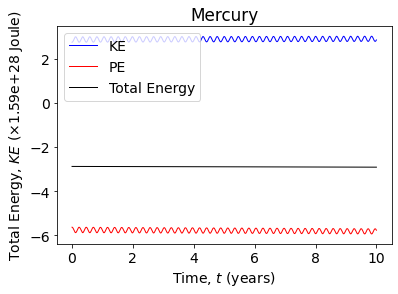

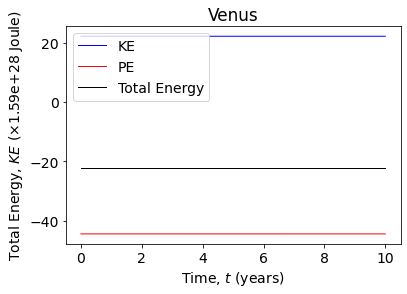

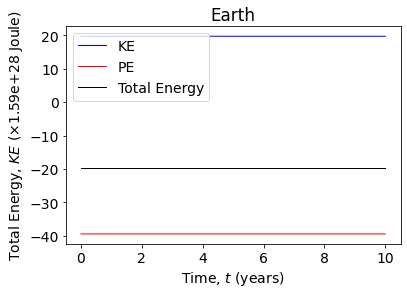

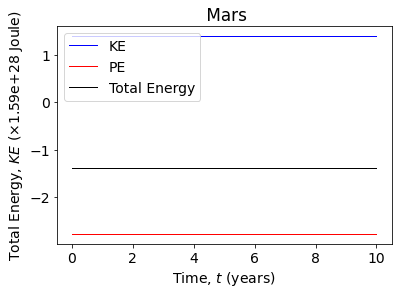

In [32]:
lbl='orbit'

mplot(1,t,KE[:,0],r'Time, $t$ (years)',r'Kinetice Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','blue','KE')
mplot(1,t,PE[:,0],r'Time, $t$ (years)',r'Potential Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','red','PE')
mplot(1,t,KE[:,0]+PE[:,0],r'Time, $t$ (years)',r'Total Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','black','Total Energy')
plt.title('Mercury')
plt.legend(loc='upper left')
plt.show()


mplot(1,t,KE[:,1],r'Time, $t$ (years)',r'Kinetice Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','blue','KE')
mplot(1,t,PE[:,1],r'Time, $t$ (years)',r'Potential Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','red','PE')
mplot(1,t,KE[:,1]+PE[:,1],r'Time, $t$ (years)',r'Total Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','black','Total Energy')
plt.title('Venus')
plt.legend(loc='upper left')
plt.show()

mplot(1,t,KE[:,2],r'Time, $t$ (years)',r'Kinetice Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','blue','KE')
mplot(1,t,PE[:,2],r'Time, $t$ (years)',r'Potential Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','red','PE')
mplot(1,t,KE[:,2]+PE[:,2],r'Time, $t$ (years)',r'Total Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','black','Total Energy')
plt.title('Earth')
plt.legend(loc='upper left')
plt.show()

mplot(1,t,KE[:,3],r'Time, $t$ (years)',r'Kinetice Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','blue','KE')
mplot(1,t,PE[:,3],r'Time, $t$ (years)',r'Potential Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','red','PE')
mplot(1,t,KE[:,3]+PE[:,3],r'Time, $t$ (years)',r'Total Energy, $KE$ ($\times$'+str("%.*e"%(2, EE))+' Joule)','black','Total Energy')
plt.title(' Mars')
plt.legend(loc='upper left')
plt.show()


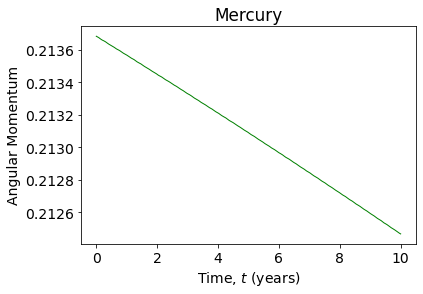

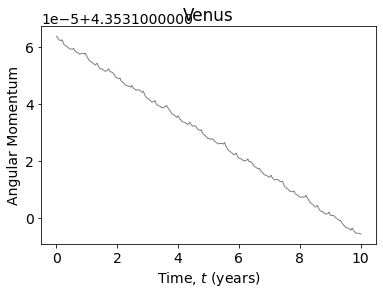

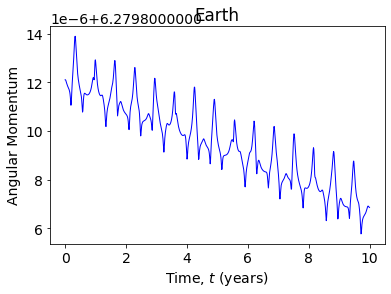

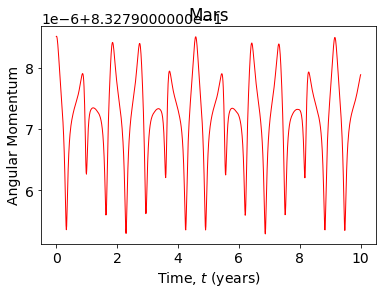

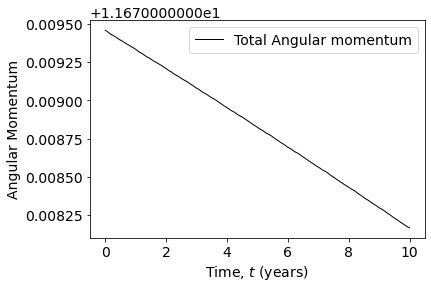

In [33]:
mplot(0,t,AM[:,0],r'Time, $t$ (years)',r'Angular Momentum','green',lbl)
plt.title('Mercury')
plt.show()

mplot(1,t,AM[:,1],r'Time, $t$ (years)',r'Angular Momentum','grey',lbl)
plt.title('Venus')
plt.show()

mplot(2,t,AM[:,2],r'Time, $t$ (years)',r'Angular Momentum','blue',lbl)
plt.title('Earth')
# plt.xlim(0.0,50)
plt.show()

mplot(3,t,AM[:,3],r'Time, $t$ (years)',r'Angular Momentum','red',lbl)
plt.title('Mars')
# plt.xlim(0.0,50)
plt.show()

mplot(0,t,AM[:,0]+AM[:,1]+AM[:,2]+AM[:,3],r'Time, $t$ (years)',r'Angular Momentum','Black','Total Angular momentum')
plt.legend()
plt.show()

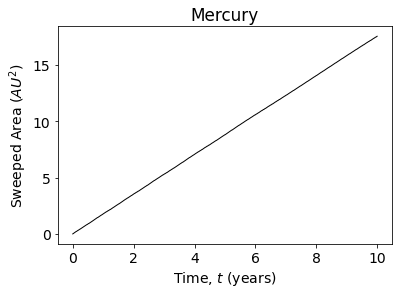

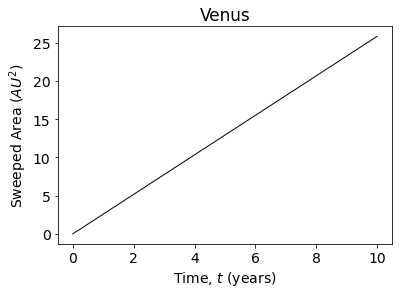

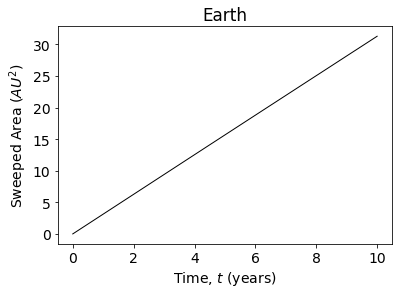

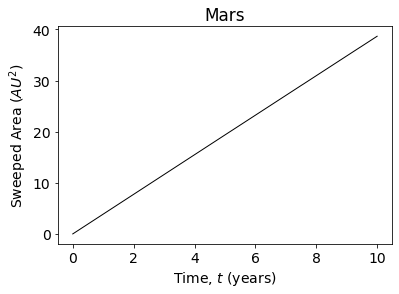

In [34]:

mplot(1,t,AreaVal[:,0],r'Time, $t$ (years)',r'Sweeped Area ($AU^2$)','black',lbl)
plt.title('Mercury')
plt.show()

mplot(2,t,AreaVal[:,1],r'Time, $t$ (years)',r'Sweeped Area ($AU^2$)','black',lbl)
plt.title('Venus')
plt.show()

mplot(3,t,AreaVal[:,2],r'Time, $t$ (years)',r'Sweeped Area ($AU^2$)','black',lbl)
plt.title('Earth')
plt.show()

mplot(3,t,AreaVal[:,3],r'Time, $t$ (years)',r'Sweeped Area ($AU^2$)','black',lbl)
plt.title('Mars')
plt.show()

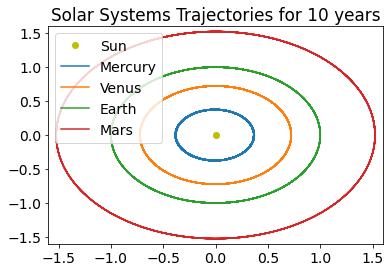

In [35]:
plt.figure()
plt.plot(0,0,'yo',label='Sun')
plt.plot(rmy[:,0],rmy[:,1],label='Mercury')
plt.plot(rv[:,0],rv[:,1],label='Venus')
plt.plot(re[:,0],re[:,1],label='Earth')
plt.plot(rms[:,0],rms[:,1],label='Mars')
plt.legend(loc='upper left')
plt.xlim(-1.6, 1.6)  
plt.ylim(-1.6,1.6)
# plt.xlim(-10, 10)  
# plt.ylim(-10,10)
# plt.axis('equal')
plt.title(f'Solar Systems Trajectories for {tf} years')
plt.show()


## Method 2: Using Center of Masses

### System of 4 planets e.g Mercury, Venus, Earth , Mars 

In [36]:
Ndim = 2
step_sum = 100
dt = 0.01
Nsteps = int(step_sum/dt)
G = 1   

t = np.linspace(0,Nsteps*dt,Nsteps)

m1 = 1.0      #Star  
m2 = 3e-6     #Planet 1
m3 = 3.6e-7   #Planet 2
m4 = 3e-6     #Planet 3

m1234 = m1 + m2 + m3 + m4
m234 = m2 + m3 + m4
m34 = m3 + m4

r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
r3 = np.zeros((Nsteps,Ndim))
r4 = np.zeros((Nsteps,Ndim))


r_com1234 = np.zeros((Nsteps,Ndim))
r_com234 = np.zeros((Nsteps,Ndim))
r_com34 = np.zeros((Nsteps,Ndim))

v_com1234 = np.zeros((Nsteps,Ndim))
v_com234 = np.zeros((Nsteps,Ndim))
v_com34 = np.zeros((Nsteps,Ndim))


v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))
v3 = np.zeros((Nsteps,Ndim))
v4 = np.zeros((Nsteps,Ndim))

r1[0]= np.array((0.0,0.0))
r2[0]= np.array((1.0,0.0))
r3[0] = np.array((2.5,0.0))
r4[0] = np.array((4.0,0.0))


r_com34[0] = np.array((center_of_mass(r4[0],r3[0],m4,m3)))
r_com234[0] = np.array((center_of_mass(r2[0],r_com34[0],m2,m34)))
r_com1234[0] = np.array((center_of_mass(r1[0],r_com234[0],m1,m234)))


v1[0] = np.array((0.0,-initial_velocity(r1[0],r_com234[0],m1,m234)))  


v2[0]= np.array((0.0,-initial_velocity(r2[0],r_com34[0],m2,m34))) 
v3[0] = np.array((0.0,initial_velocity(r3[0],r4[0],m3,m4))) 
v4[0] = np.array((0.0,-initial_velocity(r4[0],r3[0],m4,m3))) 

# v_com1234 = np.zeros(0.0,initial_velocity())
v_com234[0] = np.array((0.0,initial_velocity(r_com234[0],r1[0],m234,m1)))
v_com34[0] = np.array((0.0,initial_velocity(r_com34[0],r2[2],m34,m2)))


/var/folders/0y/rxyxzgvj6w98rkkdqslkxlf80000gn/T/ipykernel_35659/292809395.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(r2[0,0],r2[0,1],'ro',label='Mercury',color='red')
/var/folders/0y/rxyxzgvj6w98rkkdqslkxlf80000gn/T/ipykernel_35659/292809395.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(r4[0,0],r4[0,1],'bo',label='Earth',color='blue')


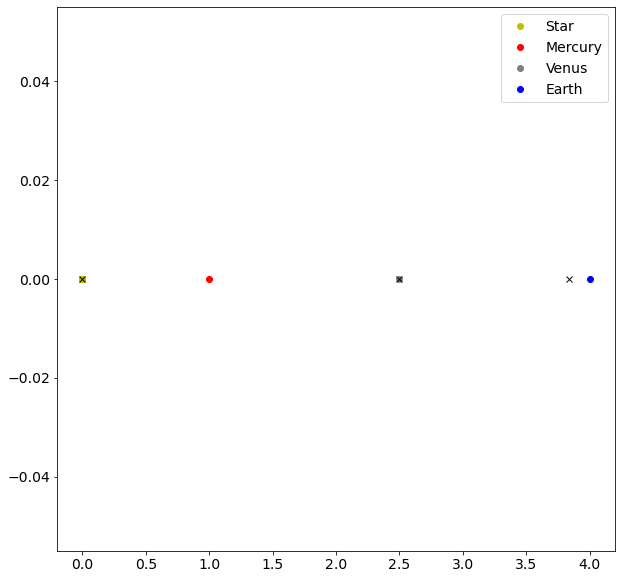

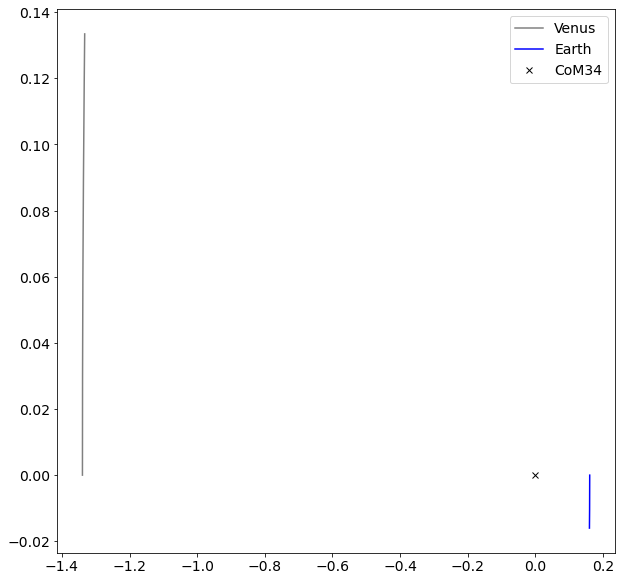

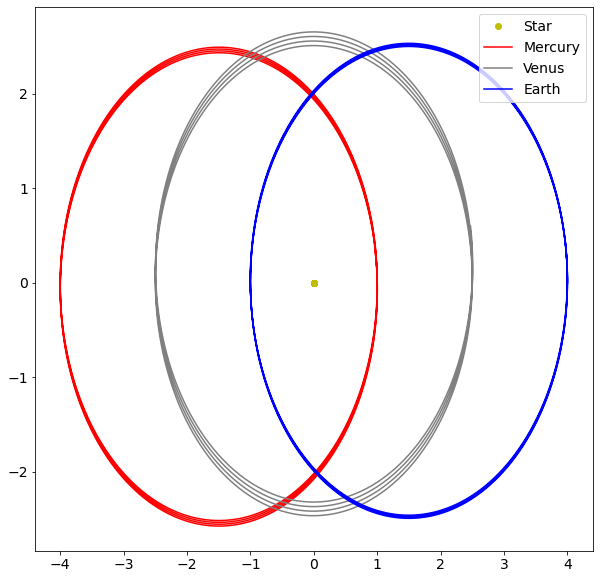

In [37]:
plt.figure(figsize=(10,10))
plt.plot(r1[:,0],r1[:,1],'yo',label='Star')
plt.plot(r2[0,0],r2[0,1],'ro',label='Mercury',color='red')
plt.plot(r3[0,0],r3[0,1],'o',label='Venus',color='grey')
plt.plot(r4[0,0],r4[0,1],'bo',label='Earth',color='blue')
plt.plot(r_com34[0,0],r_com34[0,1],'x',color='black')
plt.plot(r_com234[0,0],r_com234[0,1],'x',color='black')
plt.plot(r_com1234[0,0],r_com1234[0,1],'x',color='black')
plt.legend(loc='upper right')
plt.show()


#=================================================================================================#
# evaluating the furthest system of m3 and m4, need to center evrything at m34

r4 -= r_com34
r3 -= r_com34

# plt.figure(figsize=(10,10))
# plt.plot(r3[0,0],r3[0,1],'o',label='Venus',color='grey')
# plt.plot(r4[0,0],r4[0,1],'bo',label='Earth',color='blue')
# plt.plot(0,0,'x',color='black',label='CoM34')
# plt.legend(loc='upper right')

for i in range(Nsteps-1):
    
    r3[i+1] , v3[i+1] = RK4(r3[i],r4[i],v3[i],m3,m4,dt)
    r4[i+1] , v4[i+1] = RK4(r4[i],r3[i],v4[i],m4,m3,dt)
    
plt.figure(figsize=(10,10))
plt.plot(r3[:,0],r3[:,1],label='Venus',color='grey')
plt.plot(r4[:,0],r4[:,1],label='Earth',color='blue')
plt.plot(0,0,'x',color='black',label='CoM34')
plt.legend(loc='upper right')

#=================================================================================================#
# evaluating the system of m2 and m34 , need to center everything at m234

r_com34 -= r_com234
r2 -= r_com234

# plt.figure(figsize=(10,10))
# plt.plot(r2[0,0],r2[0,1],'o',label='Mercury',color='Grey')
# plt.plot(r_com34[0,0],r_com34[0,1],'x',label='CoM34')
# plt.plot(0,0,'x',color='black',label='CoM234')
# plt.legend(loc='upper right')


for i in range(Nsteps-1):
    
    r_com34[i+1] , v_com34[i+1] = RK4(r_com34[i],r2[i],v_com34[i],m34,m2,dt)
    r2[i+1] , v2[i+1] = RK4(r2[i],r_com34[i],v2[i],m2,m34,dt)
    
    
#=================================================================================================#
# evaluating the system of m1 and m234 , need to center everything at m1234

r1 -= r_com1234
r_com234 -= r_com1234

for i in range(Nsteps-1):
    
    r_com234[i+1] , v_com234[i+1] = RK4(r_com234[i],r1[i],v_com234[i],m234,m1,dt)
    r1[i+1] , v1[i+1] = RK4(r1[i],r_com234[i],v1[i],m1,m234,dt)
    
# Shifting everything backwards 

r_com34 += r_com234
r2 += r_com234

r4 += r_com34
r3 += r_com34



plt.figure(figsize=(10,10))
plt.plot(r1[:,0],r1[:,1],'yo',label='Star')
plt.plot(r2[:,0],r2[:,1],label='Mercury',color='red')
plt.plot(r3[:,0],r3[:,1],label='Venus',color='grey')
plt.plot(r4[:,0],r4[:,1],label='Earth',color='blue')
plt.legend(loc='upper right')
plt.show()